# To create a model which predicts a probability of each type of toxicity for each comment.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#EXTRACTING DATASET


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
pip install kaggle --upgrade

Requirement already up-to-date: kaggle in /usr/local/lib/python3.7/dist-packages (1.5.10)


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"amandeeprana25","key":"27121a9c08c03142ff52faca5aae2083"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! cd /content/drive/MyDrive/AI-Project-Toxic-classification/kaggle
! kaggle competitions download -c jigsaw-toxic-comment-classification-challenge
#kaggle competitions download -c jigsaw-toxic-comment-classification-challenge

401 - Unauthorized


In [ ]:
! mkdir train
! unzip /content/drive/MyDrive/AI-Project-Toxic-classification/Jigsaw dataset/train/train.csv -d train

unzip:  cannot find or open /content/drive/MyDrive/AI-Project-Toxic-classification/Jigsaw, /content/drive/MyDrive/AI-Project-Toxic-classification/Jigsaw.zip or /content/drive/MyDrive/AI-Project-Toxic-classification/Jigsaw.ZIP.


In [ ]:
! mkdir test
! unzip /content/drive/MyDrive/AI-Project-Toxic-classification/Jigsaw dataset/test/test.csv -d test

unzip:  cannot find or open /content/drive/MyDrive/AI-Project-Toxic-classification/Jigsaw, /content/drive/MyDrive/AI-Project-Toxic-classification/Jigsaw.zip or /content/drive/MyDrive/AI-Project-Toxic-classification/Jigsaw.ZIP.


#### **ADDED DATASETS; RUN CELLS FROM HERE **

# Jigsaw Dataset (1)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_train=pd.read_csv('/content/drive/MyDrive/AI-Project-Toxic-classification/Jigsaw dataset/train/train.csv')

In [ ]:
df_train.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [ ]:
df_train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
print("Total number of columns: ",df_train.shape[1])
print("Total number of rows: ",df_train.shape[0])

Total number of columns:  8
Total number of rows:  159571


#Davidson Hate speech (3)

In [ ]:
df_train3=pd.read_csv('/content/drive/MyDrive/AI-Project-Toxic-classification/davidson_dataset/labeled_data.csv')

In [ ]:
df_train3.head(10)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5,5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just..."
6,6,3,0,3,0,1,"!!!!!!""@__BrighterDays: I can not just sit up ..."
7,7,3,0,3,0,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...
8,8,3,0,3,0,1,""" &amp; you might not get ya bitch back &amp; ..."
9,9,3,1,2,0,1,""" @rhythmixx_ :hobbies include: fighting Maria..."


In [ ]:
df_train3.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


# Wikipedia Dataset

In [ ]:
df_wiki = pd.read_csv('/content/drive/MyDrive/AI-Project-Toxic-classification/wikipedia dataset/toxicity_annotated_comments.tsv',sep='\t')

In [ ]:
df_wiki.head()

,rev_id,comment,year,logged_in,ns,sample,split
0,2232.0,This:NEWLINE_TOKEN:One can make an analogy in ...,2002,True,article,random,train
1,4216.0,`NEWLINE_TOKENNEWLINE_TOKEN:Clarification for ...,2002,True,user,random,train
2,8953.0,Elected or Electoral? JHK,2002,False,article,random,test
3,26547.0,`This is such a fun entry. DevotchkaNEWLINE_...,2002,True,article,random,train
4,28959.0,Please relate the ozone hole to increases in c...,2002,True,article,random,test


In [ ]:
df_wiki.describe()

,rev_id,year
count,1.596860e+05,159686.000000
mean,3.005779e+08,2009.224159
std,1.987478e+08,2.910620
min,2.232000e+03,2001.000000
25%,1.263791e+08,2007.000000
50%,2.714297e+08,2009.000000
75%,4.606385e+08,2011.000000
max,6.998972e+08,2016.000000


In [ ]:
df_wiki2 = pd.read_csv('/content/drive/MyDrive/AI-Project-Toxic-classification/wikipedia dataset/toxicity_annotations.tsv',sep='\t')

In [ ]:
df_wiki2.head()

,rev_id,worker_id,toxicity,toxicity_score
0,2232.0,723,0,0.0
1,2232.0,4000,0,0.0
2,2232.0,3989,0,1.0
3,2232.0,3341,0,0.0
4,2232.0,1574,0,1.0


In [ ]:
df_wiki2.describe()

,rev_id,worker_id,toxicity,toxicity_score
count,1.598289e+06,1.598289e+06,1.598289e+06,1.598289e+06
mean,3.004792e+08,1.992859e+03,1.451896e-01,2.049235e-01
std,1.987538e+08,1.202848e+03,3.522920e-01,7.654754e-01
min,2.232000e+03,0.000000e+00,0.000000e+00,-2.000000e+00
25%,1.262407e+08,9.410000e+02,0.000000e+00,0.000000e+00
50%,2.713347e+08,1.966000e+03,0.000000e+00,0.000000e+00
75%,4.605636e+08,3.001000e+03,0.000000e+00,1.000000e+00
max,6.998972e+08,4.300000e+03,1.000000e+00,2.000000e+00


In [ ]:
df_wiki3 = pd.read_csv('/content/drive/MyDrive/AI-Project-Toxic-classification/wikipedia dataset/toxicity_worker_demographics.tsv',sep='\t')

In [ ]:
df_wiki3.head()

,worker_id,gender,english_first_language,age_group,education
0,85,female,0,18-30,bachelors
1,1617,female,0,45-60,bachelors
2,1394,female,0,NaN,bachelors
3,311,male,0,30-45,bachelors
4,1980,male,0,45-60,masters


In [ ]:
df_wiki3.describe()

,worker_id,english_first_language
count,3591.000000,3591.000000
mean,2098.276525,0.185464
std,1239.453608,0.388727
min,0.000000,0.000000
25%,1021.500000,0.000000
50%,2079.000000,0.000000
75%,3170.500000,0.000000
max,4300.000000,1.000000




---



# Cjziems dataset (2)

In [ ]:
df_train2=pd.read_csv('/content/drive/MyDrive/AI-Project-Toxic-classification/cjziems_cyberbullying_dataset/X.csv')

In [ ]:
df_train2.head(10)

,tweet_id,FKRA,FRE,achieve,adverb,affect,aggr_auth_messages,aggr_follow_up_users,aggr_messages,anger,anx,article,assent,auth_followers,auth_friends,auth_verified,author_message_count,auxverb,bi_overlap,bio,body,cause,certain,cogmech,comp,conj,cross_entropy,death,discrep,down_mentions,downward_overlap,excl,family,feel,filler,follow_up_messages,follow_up_users,friend,funct,future,...,new_words_ratio,nonfl,num_chars,num_unique_terms,num_words,number,out_overlap,past,percept,pos,posemo,ppron,preps,present,pronoun,quant,relativ,relig,sad,see,sexual,shehe,social,space,swear,targ_followers,targ_friends,targ_verified,target_message_count,tentat,they,thread_length,time,timeline_sim,up_mentions,upward_overlap,verb,we,work,you
0,1138312060360679425,0.5,100.24,0.0,0.0,1.0,4.0,1.0,4.0,1.0,0.0,0.0,0.0,1283.0,737.0,False,2671.0,1.0,0.030968,0.0,0.0,0.0,0.0,0.0,-0.5859,0.0,6.614258,0.0,0.0,13.0,0.025434,0.0,0.0,0.0,0.0,6.0,2.0,0.0,3.0,0.0,...,0.000000,0.0,20.0,5.0,5.0,0.0,0.023105,1.0,0.0,0.000,0.0,2.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,507.0,370.0,False,3027.0,0.0,0.0,0.180000,0.0,0.824527,28.0,0.023868,2.0,0.0,0.0,1.0
1,1138312190363131905,-1.4,116.15,1.0,0.0,2.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,761.0,762.0,False,1294.0,0.0,0.000000,1.0,1.0,0.0,0.0,0.0,0.0772,0.0,5.229526,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.200000,0.0,29.0,6.0,6.0,0.0,0.000000,0.0,0.0,0.426,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,174.0,129.0,False,2123.0,0.0,0.0,13.847222,0.0,0.645923,0.0,0.000000,0.0,0.0,0.0,0.0
2,1138312223942696960,5.2,62.81,0.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,141.0,193.0,False,1470.0,0.0,0.078889,1.0,0.0,0.0,0.0,0.0,-0.6901,1.0,6.333759,0.0,0.0,14.0,0.101727,0.0,0.0,0.0,0.0,2.0,2.0,0.0,1.0,0.0,...,0.500000,0.0,19.0,3.0,3.0,0.0,0.104056,1.0,0.0,0.000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,569.0,433.0,False,302.0,0.0,0.0,3.285000,0.0,0.718583,5.0,0.068724,1.0,0.0,0.0,0.0
3,1138312316217372672,-2.2,118.18,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,1533.0,1222.0,False,1807.0,0.0,0.028792,1.0,1.0,0.0,0.0,0.0,-0.5848,0.0,7.557282,0.0,0.0,9.0,0.026520,0.0,0.0,0.0,0.0,2.0,2.0,0.0,1.0,0.0,...,0.333333,0.0,21.0,4.0,4.0,0.0,0.031338,0.0,0.0,0.000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1395.0,983.0,False,826.0,0.0,0.0,1.675278,0.0,0.883867,10.0,0.021468,0.0,0.0,0.0,0.0
4,1138312400099205120,7.8,71.06,0.0,2.0,3.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,3057.0,782.0,False,2008.0,2.0,0.138712,1.0,0.0,1.0,0.0,1.0,0.7630,2.0,7.843226,0.0,0.0,15.0,0.060216,0.0,0.0,0.0,0.0,1.0,1.0,0.0,10.0,0.0,...,0.200000,0.0,98.0,18.0,18.0,0.0,0.190141,0.0,0.0,0.291,2.0,3.0,2.0,2.0,4.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,1.0,4765.0,570.0,False,2415.0,0.0,0.0,0.344444,0.0,0.901134,98.0,0.066513,2.0,0.0,0.0,1.0
5,1138312479795232768,0.8,103.54,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,46.0,False,1.0,0.0,0.000196,2.0,2.0,0.0,0.0,0.0,-0.5106,0.0,7.649693,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,1.000000,0.0,34.0,8.0,8.0,0.0,0.010989,0.0,1.0,0.000,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,2.0,0.0,1.0,1.0,2.0,31820.0,46.0,False,259.0,0.0,0.0,7.670556,0.0,0.000000,0.0,0.000000,1.0,0.0,0.0,0.0
6,1138312504961110016,4.0,89.51,0.0,1.0,2.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,91.0,85.0,False,199.0,1.0,0.020341,1.0,1.0,1.0,0.0,3.0,0.3818,0.0,9.466104,0.0,1.0,4.0,0.023736,1.0,0.0,0.0,0.0,1.0,1.0,0.0,6.0,1.0,...,0.250000,0.0,68.0,13.0,13.0,1.0,0.027083,1.0,0.0,0.311,2.0,3.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,3.0,0.0,1.0,1165.0,901.0,False,2582.0,0.0,0.0,24.676389,1.0,0.753384,1.0,0.022077,1.0,0.0,0.0,1.0
7,1138312509130248192,6.1,85.14,0.0,1.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,414.0,443.0,False,1893.0,0.0,0.041051,2.0,2.0,0.0,0.0,3.0,-0.1045,0.0,7.706977,0.0,0.0,5.0,0.014652,0.0,1.0,0.0,0.0,1.0,1.0,0.0,11.0,0.0,...,0.090909,0.0,101.0,19.0,19.0,1.0,0.052632,0.0,0.0,0.140,1.0,1.0,4.0,0.0,2.0,2.0,3.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,2.0,225.0,417.0,False,883.0,2.0,0.0,4.920000,0.0,0.810111,8.0,0.016743,0.0

In [ ]:
df_train2.describe()

,tweet_id,FKRA,FRE,achieve,adverb,affect,aggr_auth_messages,aggr_follow_up_users,aggr_messages,anger,anx,article,assent,auth_followers,auth_friends,author_message_count,auxverb,bi_overlap,bio,body,cause,certain,cogmech,comp,conj,cross_entropy,death,discrep,down_mentions,downward_overlap,excl,family,feel,filler,follow_up_messages,follow_up_users,friend,funct,future,health,...,neu,new_words_ratio,nonfl,num_chars,num_unique_terms,num_words,number,out_overlap,past,percept,pos,posemo,ppron,preps,present,pronoun,quant,relativ,relig,sad,see,sexual,shehe,social,space,swear,targ_followers,targ_friends,target_message_count,tentat,they,thread_length,time,timeline_sim,up_mentions,upward_overlap,verb,we,work,you
count,5.537000e+03,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5.537000e+03,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,...,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.00000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5.537000e+03,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000
mean,1.138553e+18,3.655770,88.050735,0.116850,0.492324,1.434531,1.126061,0.439408,1.397146,0.885317,0.031606,0.560592,0.125519,3.095827e+03,842.953404,1407.418999,0.857143,0.026530,1.005057,0.515803,0.136536,0.158931,1.353440,-0.301545,0.501716,6.882275,0.027452,0.147553,30.012823,0.019467,0.270182,0.045693,0.049846,0.067365,1.837999,0.953043,0.011017,5.216724,0.066281,0.056168,...,0.575707,0.194649,0.019686,54.759437,10.299982,10.773162,0.054723,0.034317,0.311360,0.258443,0.108312,0.449341,1.190898,0.937150,1.141412,1.799169,0.232978,1.07784,0.068449,0.045693,0.115767,0.592198,0.141954,1.164891,0.515261,0.967311,2.010953e+06,2575.239119,1374.182770,0.199928,0.093191,91.625147,0.460358,0.547565,14.058515,0.019007,1.625429,0.063392,0.110890,0.364277
std,1.173344e+14,7.074894,48.425105,0.363975,0.758136,1.020431,0.427135,0.656768,0.822778,0.676582,0.189819,0.803479,0.371920,1.020279e+05,1634.083724,1048.661106,1.005943,0.044196,0.740774,0.629660,0.381750,0.407246,1.544459,0.450133,0.800586,1.559034,0.174114,0.407757,109.778605,0.036291,0.573028,0.224671,0.232883,0.261952,2.887138,1.075189,0.106107,3.965074,0.260847,0.247652,...,0.240272,0.237648,0.138931,32.482826,5.858932,6.348915,0.242823,0.046158,0.646133,0.558236,0.156135,0.708643,1.245891,1.091226,1.161947,1.567754,0.510981,1.28530,0.291702,0.218970,0.370711,0.619292,0.482801,1.340136,0.789307,0.558222,1.040616e+07,15206.606810,960.324287,0.496316,0.350452,1362.691153,0.767798,0.244891,45.809193,0.036310,1.422310,0.284076,0.370496,0.678459
min,1.138312e+18,-3.400000,-2329.730000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.970000,0.000000,0.298962,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.138472e+18,0.700000,77.810000,0.000000,0.000000,1.



---



#Working on jigsaw dataset (visualization)

In [ ]:
#the dataset
df_train.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [ ]:
#total columns in the dataset
print(df_train.columns.tolist())


['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']


In [ ]:
#shape of the data
df_train.shape

(159571, 8)

In [ ]:
#the dataset
df_train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Observation**: The count values clearly indicate that there are no null values present

In [ ]:
#confirming the number of missing values in the data set
df_train.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [ ]:
#total columns in the dataset
colms=df_train.columns.tolist()
colms=colms[2:]
print(colms)

NameError: ignored

In [ ]:
col_count=[]
for col in colms:
  count=0
  for items in df_train[col]:
    if items==1:
      count+=1
  col_count.append(count)

zip_col= list(zip(colms, col_count))
print(zip_col)



[('toxic', 15294), ('severe_toxic', 1595), ('obscene', 8449), ('threat', 478), ('insult', 7877), ('identity_hate', 1405)]


In [ ]:
print("total toxic comments = ", sum(col_count), " and total non-toxic comments = ", (df_train.shape[0]-sum(col_count)))

total toxic comments =  35098  and total non-toxic comments =  124473


In [ ]:
import random

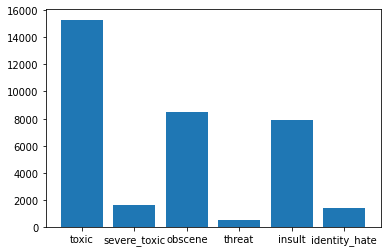

In [ ]:
fig = plt.figure()
ax=fig.add_subplot(111)
ax.bar(colms, col_count)
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


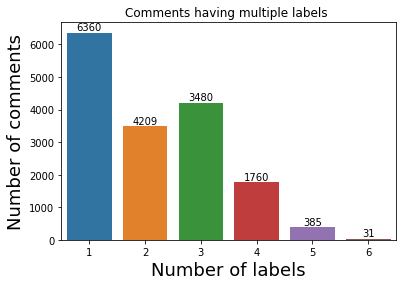

In [ ]:
rowSums = df_train.iloc[:,2:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)
plt.title("Comments having multiple labels ")
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()



---



In [ ]:
import matplotlib.pyplot as plt


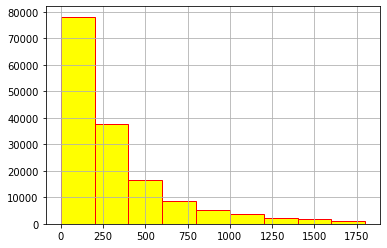

In [ ]:
#number of characters present in each sentence
df_train['comment_text'].str.len().hist(ec="red", color="yellow", bins = np.arange(0, 2000, 200))


**Observation**: The histogram shows that comments range from 1 to 1750 characters and generally, it is between 1 to 500 characters.


---





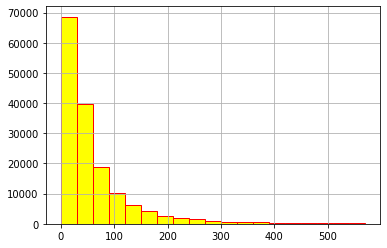

In [ ]:
#plot for the number of words appearing in each comment
def plot_word_number_histogram(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist(ec="red", color="yellow", bins = np.arange(0, 600, 30))

plot_word_number_histogram(df_train['comment_text'])


**Observation**: It is clear that the number of words in a comment ranges from 1 to 400 and mostly falls between 1 to 100 words.


---




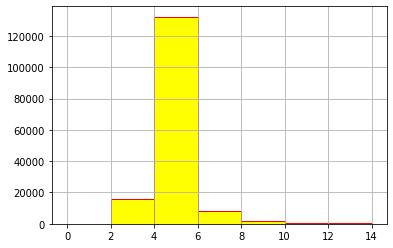

In [ ]:
#average word length in each sentence
import numpy as np
def plot_word_length_histogram(text):
    text.str.split().\
        apply(lambda x : [len(i) for i in x]). \
        map(lambda x: np.mean(x)).\
        hist(ec="red", color="yellow", bins = [0,2,4,6,8,10,12,14])

plot_word_length_histogram(df_train['comment_text'])

**Observation**: The average word length ranges between 2 to 10 with 5 being the most common word length. Does it mean that people are using really short words in comments? One reason for this can be, stopwords. ("the”/”a”/”an” )

Due to the presence of these stop words, the average word length might be incorrectly left-skewed. 

---








In [ ]:
#Analyzing the amount and the types of stopwords using the corpus of the nltk library. 
#Nltk contains stopwords from many languages. Considering only English here.  
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop=set(stopwords.words('english'))

def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


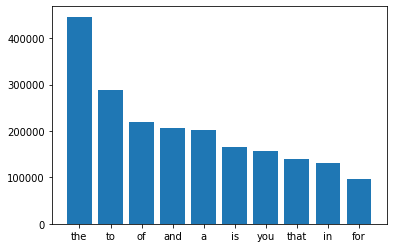

In [ ]:
plot_top_stopwords_barchart(df_train['comment_text'])

**Observation**: It can be easily seen that stopwords such as “the”, ”to”, “of”, ”and” and “a” dominate in the comments.




---



Now important processes to do in order to better understand the data are:

*   *Lowercasing*:Like converting "The" to "the"
*   *Remove stopword and punctuation*: Such as “the”, ”to”, “of”, ”and” and “a” 
*   *Tokenize*: Convert sentences into a list of tokens
*   *Lemmatize/Stemming*: Reduce the inflectional forms of words to its stem, like "who" and "whose"


---










In [ ]:
df_train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
#only removes stop words and lowers, particularly for wordcloud
df_train['processed_text'] = df_train['comment_text'].apply(lambda x: " ".join([stemmer.stem(i) for i in x.split() if i not in stop]).lower())

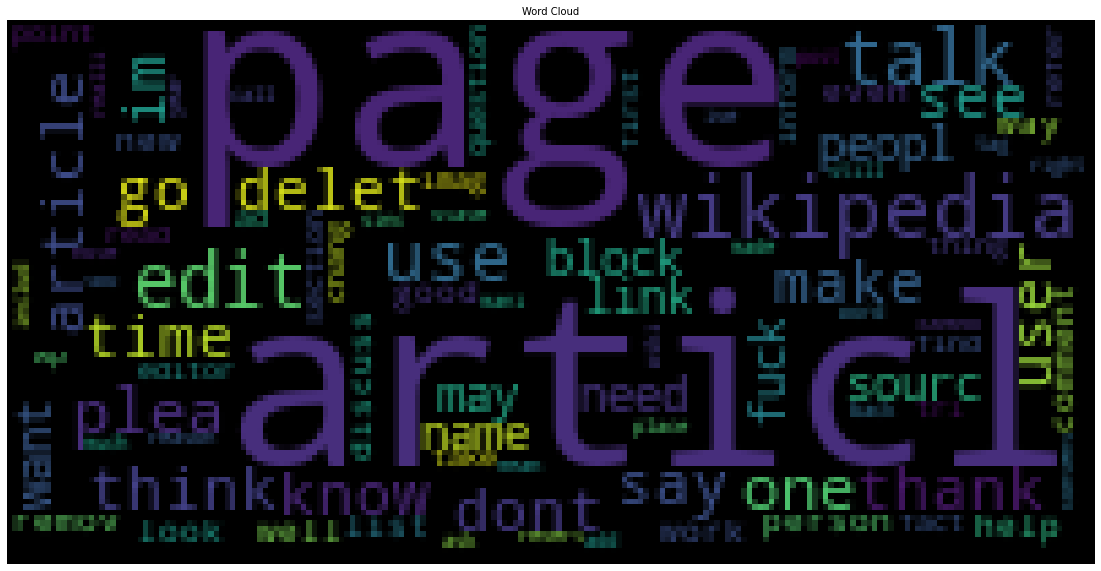

In [ ]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize=(20,10))
# clean
text = df_train.processed_text.values
cloud_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=200,
                          height=100
                         ).generate(" ".join(text))
plt.axis('off')
plt.title("Word Cloud",fontsize=10)
plt.imshow(cloud_toxic)

In [ ]:
#Tokenizing and Lemmatizing using NLTK
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')

def preprocess_comments(df):
    corpus=[]
    stem=  PorterStemmer()
    lem=WordNetLemmatizer()
    for df_train in df['comment_text']:
        words=[w for w in word_tokenize(df_train) if (w not in stop)]
        
        words=[lem.lemmatize(w) for w in words if len(w)>2]
        
        corpus.append(words)
    return corpus

corpus=preprocess_comments(df_train)
print(corpus)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



**Observation**: The bigger and bolder the word appears, the more often it’s mentioned within a given text and the more important it is.


---






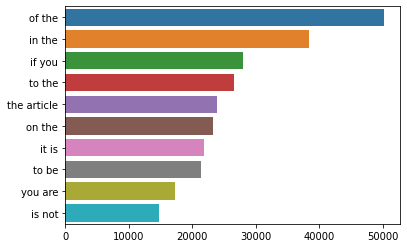

In [ ]:
#Most frequent n-grams to understand the context in which the word was used
#Using the ngrams function from nltk.util. 

#bigrams
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

plot_top_ngrams_barchart(df_train['comment_text'],2)


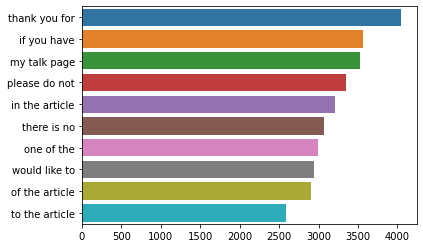

In [ ]:
#trigrams
plot_top_ngrams_barchart(df_train['comment_text'],3)


In [ ]:
stemmer = PorterStemmer()
df_train['processed_text'] = df_train['comment_text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in stop]).lower())

**Observation**: The trigram analysis is more insightful. Phrases like "thank you for", "if you have", "my talk page", "please do not", and "would like to" dominate most comments!



---



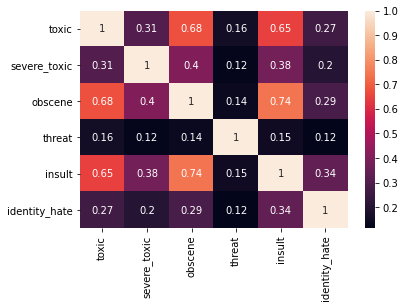

In [ ]:
#visualizing correlation

target_data = df_train.drop(['id', 'comment_text'], axis=1)
corrMatrix = target_data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

**Observation**: Correlation helps us finding relationship/dependencies. Some labels are highely correlated. Correlation coefficient for insult-obscene is 0.74.


1.   "Toxic" comments are clearly correlated with both "obscene" and "insult" comments.
2.   Interestingly, "toxic" and "severe_toxic" are only weakly correlated.

3.   "Obscene" comments and "insult" comments are also highly correlated, which makes perfect sense.






---



# Hierarchical Attention Network Approach

In [ ]:
import numpy as np 
import pandas as pd 
np.random.seed(42)

import os
import sys
from keras import backend as K
from keras.layers import Dense,Input, LSTM, Bidirectional, Embedding, TimeDistributed, SpatialDropout1D
from keras.preprocessing import text, sequence
from keras import initializers, regularizers, constraints, optimizers, layers, callbacks
from keras.callbacks import EarlyStopping, ModelCheckpoint, Callback
from keras.models import Model
from keras.optimizers import Adam
from keras import losses
from keras import initializers as initializers, regularizers, constraints
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score
import nltk
import re
from keras.engine.topology import Layer

import warnings
warnings.filterwarnings('ignore')



In [ ]:
#Embedding file
#EMBEDDING_FILE = '../input/glove6b200d/glove.6B.200d.txt'

#Training Files
train = pd.read_csv('/content/drive/MyDrive/AI-Project-Toxic-classification/Jigsaw dataset/train/train.csv')


#Testing Files
test = pd.read_csv('/content/drive/MyDrive/AI-Project-Toxic-classification/Jigsaw dataset/test/test.csv')

In [ ]:
#Extracting the comments and removing the Empty comments and storing it as a numpy array 
list_sentences_train = train["comment_text"].fillna("_na_").values
list_sentences_test = test["comment_text"].fillna("_na_").values

list_classes = ["toxic","severe_toxic", "obscene", "threat", "insult", "identity_hate"]

#Storing the sentences as a list
X_train = train["comment_text"].str.lower()
y_train = train[list_classes].values
X_test = test["comment_text"].str.lower()

In [ ]:
#List of comments
X_train = list(X_train)
X_test = list(X_test)

In [ ]:
X_train[1]

"d'aww! he matches this background colour i'm seemingly stuck with. thanks.  (talk) 21:51, january 11, 2016 (utc)"

In [ ]:
X_train[100]

'however, the moonlite edit noted by golden daph was me (on optus ...)  wake up wikkis.  so funny'

In [ ]:
#Removes unwanted symbols and whitespace from the text
def remove_noise(input_text):
    text = re.sub('[\\t\\n\\r\\f\\v]','',input_text) #Removes unnecessary whitespaces
    text = re.sub(r'[^\w\s]','',text) #Removes all special characters like colons
    text = text.split()
    text = [re.sub('[\d]+','',x) for x in text] #Removes numbers
    return ' '.join(text) #Joins it back

#Apply it to training and testing set
for i in range(len(X_train)):
    X_train[i] = remove_noise(X_train[i])
for i in range(len(X_test)):
    X_test[i] = remove_noise(X_test[i])

In [ ]:
#Replace some of the commonly occuring phrases and emojis with standard text 
#Text is closest in meaning to the emotion being expressed by the phrase or emoji

def replace_word(X):
    repl = {
        "im" : " I am","&lt;3": " good ",":d": " good ",":dd": " good ",":p": " good ","8)": " good ",":-)": " good ", ":)": " good ",";)": " good ",
        "(-:": " good ","(:": " good ","yay!": " good ","yay": " good ","yaay": " good ","yaaay": " good ","yaaaay": " good ",
        "yaaaaay": " good ",":/": " bad ",":&gt;": " sad ",":')": " sad ",":-(": " bad ",":(": " bad ", ":s": " bad ",":-s": " bad ",
        "&lt;3": " heart ",":d": " smile ",":p": " smile ",":dd": " smile ","8)": " smile ", ":-)": " smile ", ":)": " smile ",
        ";)": " smile ","(-:": " smile ","(:": " smile ",":/": " worry ",":&gt;": " angry ", ":')": " sad ",":-(": " sad ",":(": " sad ",
        ":s": " sad ", ":-s": " sad ",r"\br\b": "are",r"\bu\b": "you",r"\bhaha\b": "ha",r"\bhahaha\b": "ha",r"\bdon't\b": "do not",
        r"\bdoesn't\b": "does not",r"\bdidn't\b": "did not",r"\bhasn't\b": "has not",r"\bhaven't\b": "have not",r"\bhadn't\b": "had not",
        r"\bwon't\b": "will not",r"\bwouldn't\b": "would not",r"\bcan't\b": "can not",r"\bcannot\b": "can not",r"\bi'm\b": "i am",
        "m": "am","r": "are","u": "you","haha": "ha","hahaha": "ha","don't": "do not","doesn't": "does not","didn't": "did not",
        "hasn't": "has not","haven't": "have not","hadn't": "had not","won't": "will not","wouldn't": "would not","can't": "can not",
        "cannot": "can not","i'm": "i am","m": "am","i'll" : "i will","its" : "it is","it's" : "it is","'s" : " is","that's" : "that is",
        "weren't" : "were not", "fu*k" : "fuck", "shi*t" :"shit"
    }
    keys = repl.keys()
    new_X = []
    for i in X:
        arr = str(i).split()
        xx = ""
        for j in arr:
            j = str(j).lower()
            if j[:4] == 'http' or j[:3] == 'www':
                continue
            if j in keys:
                j = repl[j]
            xx += j + " "
        new_X.append(xx)
    return new_X

X_train = replace_word(X_train)
X_test = replace_word(X_test)

In [ ]:
#Maximum number of words
max_features=200000
#Maximum length of a sentence
max_senten_len=40
#Maximum length of a comment
max_senten_num=10
#Dimension of an embedding vector for the word representation
embed_size=200

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:

#Need to represent each comment as a list of sentences
#Each comment can have a maximum of 5 sentences and each sentence can have a maximum of 40 words
#Embedding size used is 200

#The Following code block basically takes up a comment and assigns each comment to a 5-length list
#Each element of the list is a sentence
def filt_sent(X,max_senten_num):
    X_sent = []
    sent_tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
    for paragraph in X:
        raw = sent_tokenizer.tokenize(paragraph)
        filt = []
        min_sent_len = 10 if len(raw) <= 10 else 10
        for sentence in raw:
            if len(sentence.split()) >= min_sent_len and len(filt) < max_senten_num:
                filt.append(sentence)
        while len(filt) < max_senten_num:
            filt.append('_nan_')
        X_sent.append(filt)
    return X_sent

In [ ]:
import matplotlib.pyplot as plt 

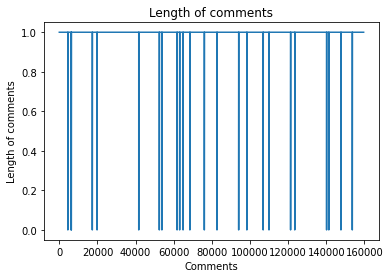

In [ ]:
s_t = nltk.data.load('tokenizers/punkt/english.pickle')
counts = []

for i in range(len(X_train)):
    raw = s_t.tokenize(X_train[i])
    counts.append(len(raw))

plt.plot(counts)
plt.xlabel("Comments")
plt.ylabel("Length of comments")
plt.title("Length of comments")
plt.show()

In [ ]:

#Getting a list of lists where each of the inner lists is a 10-d list of sentences
X_train_sent = filt_sent(X_train ,max_senten_num)
X_test_sent = filt_sent(X_test, max_senten_num)

In [ ]:
X_train_sent[1]
#len(X_train_sent[1])

['daww he matches this background colour  I am seemingly stuck with thanks talk january utc',
 '_nan_',
 '_nan_',
 '_nan_',
 '_nan_',
 '_nan_',
 '_nan_',
 '_nan_',
 '_nan_',
 '_nan_']

In [ ]:

#Need to tokenize words now
tok=text.Tokenizer(num_words=max_features,lower=True)
#Tokenizes on the combined corpus of train and text
tok.fit_on_texts(list(X_train)+list(X_test))
for i in range(len(X_train_sent)):
        X_train_sent[i] = tok.texts_to_sequences(X_train_sent[i])
        X_train_sent[i] = sequence.pad_sequences(X_train_sent[i],maxlen=max_senten_len) #padding to ensure similar sized representation for each sentence
for i in range(len(X_test_sent)):
        X_test_sent[i] = tok.texts_to_sequences(X_test_sent[i])
        X_test_sent[i] = sequence.pad_sequences(X_test_sent[i],maxlen=max_senten_len) #padding to ensure similar sized representation for each sentence

In [ ]:

#A dictionary of the words and indices based on the above text corpus
word_index = tok.word_index
len(word_index)

461997

In [ ]:
print(word_index["thanks"],word_index["good"],word_index["hate"],word_index["love"], sep=" ; ")

97 ; 95 ; 335 ; 443


In [ ]:
EMBEDDING_FILE = '/content/drive/MyDrive/AI-Project-Toxic-classification/glove.6B.200d.txt'

In [ ]:

embeddings_index={}

f = open(EMBEDDING_FILE)
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:],dtype='float32')
    embeddings_index[word] = coefs

f.close()
print('Found %s word vectors.'%len(embeddings_index))

Found 400000 word vectors.


In [ ]:
all_embeddings = np.stack(embeddings_index.values())

emb_mean= all_embeddings.mean()
emb_stddev = all_embeddings.std()

np.shape(all_embeddings)

(400000, 200)

In [ ]:
#prepare embedding matrix
num_words = min(max_features, len(word_index) + 1)
embedding_matrix = np.random.normal(emb_mean, emb_stddev, (num_words, embed_size))
for word, i in word_index.items():
    if i >= max_features:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
        
np.shape(embedding_matrix)

(200000, 200)

# Hierarchical Attention Model

1. https://gist.github.com/cbaziotis/7ef97ccf71cbc14366835198c09809d2

2. https://github.com/richliao/textClassifier

In [ ]:
import keras
print(keras.__version__)
from keras.engine.topology import Layer

2.4.3


In [ ]:
def dot_product(x, kernel):
    """
    Wrapper for dot product operation, in order to be compatible with both
    Theano and Tensorflow
    Args:
        x (): input
        kernel (): weights
    Returns:
    """
    if K.backend() == 'tensorflow':
        return K.squeeze(K.dot(x, K.expand_dims(kernel)), axis=-1)
    else:
        return K.dot(x, kernel)

class AttentionWithContext(Layer):
    """
    Attention operation, with a context/query vector, for temporal data.
    Supports Masking.
    Follows the work of Yang et al. [https://www.cs.cmu.edu/~diyiy/docs/naacl16.pdf]
    "Hierarchical Attention Networks for Document Classification"
    by using a context vector to assist the attention
    # Input shape
        3D tensor with shape: `(samples, steps, features)`.
    # Output shape
        2D tensor with shape: `(samples, features)`.
    How to use:
    Just put it on top of an RNN Layer (GRU/LSTM/SimpleRNN) with return_sequences=True.
    The dimensions are inferred based on the output shape of the RNN.
    Note: The layer has been tested with Keras 2.0.6
    Example:
        model.add(LSTM(64, return_sequences=True))
        model.add(AttentionWithContext())
        # next add a Dense layer (for classification/regression) or whatever...
    """

    def __init__(self,
                 W_regularizer=None, u_regularizer=None, b_regularizer=None,
                 W_constraint=None, u_constraint=None, b_constraint=None,
                 bias=True, **kwargs):

        self.supports_masking = True
        self.init = initializers.get('glorot_uniform')

        self.W_regularizer = regularizers.get(W_regularizer)
        self.u_regularizer = regularizers.get(u_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.u_constraint = constraints.get(u_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.bias = bias
        super(AttentionWithContext, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 3

        self.W = self.add_weight((input_shape[-1], input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        if self.bias:
            self.b = self.add_weight((input_shape[-1],),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)

        self.u = self.add_weight((input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_u'.format(self.name),
                                 regularizer=self.u_regularizer,
                                 constraint=self.u_constraint)

        super(AttentionWithContext, self).build(input_shape)

    def compute_mask(self, input, input_mask=None):
        # do not pass the mask to the next layers
        return None

    def call(self, x, mask=None):
        uit = dot_product(x, self.W)

        if self.bias:
            uit += self.b

        uit = K.tanh(uit)
        ait = dot_product(uit, self.u)

        a = K.exp(ait)

        # apply mask after the exp. will be re-normalized next
        if mask is not None:
            # Cast the mask to floatX to avoid float64 upcasting in theano
            a *= K.cast(mask, K.floatx())

        # in some cases especially in the early stages of training the sum may be almost zero
        # and this results in NaN's. A workaround is to add a very small positive number ε to the sum.
        # a /= K.cast(K.sum(a, axis=1, keepdims=True), K.floatx())
        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())

        a = K.expand_dims(a)
        weighted_input = x * a
        return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        return input_shape[0], input_shape[-1]

In [ ]:
class RocAucEvaluation(Callback):
    def __init__(self, validation_data=(), interval=1):
        super(Callback, self).__init__()

        self.interval = interval
        self.X_val, self.y_val = validation_data

    def on_epoch_end(self, epoch, logs={}):
        if epoch % self.interval == 0:
            y_pred = self.model.predict(self.X_val, verbose=0)
            score = roc_auc_score(self.y_val, y_pred)
            print("\n ROC-AUC - epoch: %d - score: %.6f \n" % (epoch+1, score))

In [ ]:
shape = (max_senten_len,)
shape

(40,)

In [ ]:

embedding_layer = Embedding(max_features,
                            embed_size,
                            input_length=max_senten_len,
                            weights=[embedding_matrix])
word_input = Input(shape=(max_senten_len,), dtype='int32')
word_seq = embedding_layer(word_input)
word_lstm = Bidirectional(LSTM(128, return_sequences=True))(word_seq)
word_out = AttentionWithContext()(word_lstm)
wordEncoder = Model(word_input, word_out)

sente_input = Input(shape=(max_senten_num, max_senten_len), dtype='int32')
sente = TimeDistributed(wordEncoder)(sente_input)
sente = SpatialDropout1D(0.2)(sente)
sente = Bidirectional(LSTM(128, return_sequences=True))(sente)
sente = AttentionWithContext()(sente)
preds = Dense(6, activation='sigmoid')(sente)
model = Model(sente_input, preds)
opt = Adam(clipnorm=5.0) #try 0.001 or 0.01 for better training 

model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['acc'])

TypeError: ignored

In [ ]:
X_train_sent = np.asarray(X_train_sent)
X_test_sent = np.asarray(X_test_sent)
print('Shape of data tensor:', X_train_sent.shape)

In [ ]:
model.summary()

In [ ]:

batch_size = 256
epochs = 5

X_tra, X_val, y_tra, y_val = train_test_split(X_train_sent, y_train, train_size=0.95, random_state=233)
RocAuc = RocAucEvaluation(validation_data=(X_val, y_val), interval=1)
filepath="/weights/weights_base.best.hdf5" #see 
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max', save_weights_only=True)
early = EarlyStopping(monitor="val_acc", mode="max", patience=5)
callbacks_list = [checkpoint, early, RocAuc]

history = model.fit(X_tra, y_tra, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val),callbacks = callbacks_list, verbose=1)

In [ ]:
y_pred = model.predict(X_test_sent,batch_size=1024,verbose=1)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
#print(history.history.keys())


plt.figure(figsize=(16,3))
plt.suptitle('Accuracy and Loss Comparison')

gridspec.GridSpec(1,2)
plt.subplot2grid((1,2),(0,0))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Augmented Model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper left')


plt.subplot2grid((1,2),(0,1))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Augmented Model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'],loc='upper left')


# CNN Approach 

In [3]:
import time
start_time = time.time()
from sklearn.model_selection import train_test_split
import sys, os, re, csv, codecs, numpy as np, pandas as pd
np.random.seed(32)
os.environ["OMP_NUM_THREADS"] = "4"
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Conv1D
from keras.layers import Bidirectional, GlobalMaxPool1D, MaxPooling1D, Add, Flatten
from keras.layers import GlobalAveragePooling1D, GlobalMaxPooling1D, concatenate, SpatialDropout1D
from keras.models import Model, load_model
from keras import initializers, regularizers, constraints, optimizers, layers, callbacks
from keras import backend as K
from keras.engine import InputSpec, Layer

In [4]:
import logging
from sklearn.metrics import roc_auc_score
from keras.callbacks import Callback

class RocAucEvaluation(Callback):
    def __init__(self, validation_data=(), interval=1):
        super(Callback, self).__init__()

        self.interval = interval
        self.X_val, self.y_val = validation_data

    def on_epoch_end(self, epoch, logs={}):
        if epoch % self.interval == 0:
            y_pred = self.model.predict(self.X_val, verbose=0)
            score = roc_auc_score(self.y_val, y_pred)
            print("\n ROC-AUC - epoch: {:d} - score: {:.6f}".format(epoch+1, score))

Loading the necessary files from the drive

In [5]:
train = pd.read_csv("/content/drive/MyDrive/AI-Project-Toxic-classification/Jigsaw dataset/train/train.csv")
test = pd.read_csv("/content/drive/MyDrive/AI-Project-Toxic-classification/Jigsaw dataset/test/test.csv")

embedding_path = "/content/drive/MyDrive/AI-Project-Toxic-classification/glove.6B.200d.txt"
embed_size = 200
max_features = 100000
max_len = 150

Listing the 6 classes and splitting the dataset into train,val,test

In [6]:
list_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
y = train[list_classes].values
train["comment_text"].fillna("no comment")
test["comment_text"].fillna("no comment")
X_train, X_valid, Y_train, Y_valid = train_test_split(train, y, test_size = 0.1)

Data Pre-processing - lowering the case, converting into sequences

In [7]:
raw_text_train = X_train["comment_text"].str.lower()
raw_text_valid = X_valid["comment_text"].str.lower()
raw_text_test = test["comment_text"].str.lower()

tk = Tokenizer(num_words = max_features, lower = True)
tk.fit_on_texts(raw_text_train)
X_train["comment_seq"] = tk.texts_to_sequences(raw_text_train)
X_valid["comment_seq"] = tk.texts_to_sequences(raw_text_valid)
test["comment_seq"] = tk.texts_to_sequences(raw_text_test)

X_train = pad_sequences(X_train.comment_seq, maxlen = max_len)
X_valid = pad_sequences(X_valid.comment_seq, maxlen = max_len)
test = pad_sequences(test.comment_seq, maxlen = max_len)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
def get_coefs(word,*arr): 
    return word, np.asarray(arr, dtype='float32')
embedding_index = dict(get_coefs(*o.strip().split(" ")) for o in open(embedding_path))

creating the embedding matrix

In [9]:
word_index = tk.word_index
nb_words = min(max_features, len(word_index))
embedding_matrix = np.zeros((nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

Defining the model and performing the fit operation

In [ ]:
# Approach 24th april 2021

In [14]:
from tensorflow.keras.models import Model,Sequential,load_model
from tensorflow.keras.layers import Conv3D,MaxPooling3D,ZeroPadding3D,Flatten,Dense,Dropout,Convolution3D
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,BatchNormalization,ReLU,MaxPooling2D,Add
from tensorflow.keras.layers import GlobalAveragePooling2D,concatenate,AveragePooling2D
from tensorflow.keras.optimizers import SGD,RMSprop
from tensorflow.keras.losses import categorical_crossentropy,MeanSquaredError,MeanAbsolutePercentageError
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.callbacks import CSVLogger, TensorBoard
from tensorflow.keras.metrics import TruePositives,FalsePositives,TrueNegatives,FalseNegatives
from tensorflow.keras.metrics import AUC,Accuracy,Precision,Recall

from sklearn.utils import class_weight
import datetime
from tensorflow.keras import Input
from tensorflow.keras import initializers

In [15]:
from keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from keras.layers import GRU, BatchNormalization, Conv1D, MaxPooling1D

In [18]:

# import tensorflow as tf
# from keras.optimizers import Adam, RMSprop
# from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
# from keras.layers import GRU, BatchNormalization, Conv1D, MaxPooling1D

# file_path = "/content/drive/MyDrive/AI-Project-Toxic-classification/weights/best_model_proposed.hdf5" 
# check_point = ModelCheckpoint(file_path, monitor = "val_loss", verbose = 1,
#                               save_best_only = True, mode = "min")
# ra_val = RocAucEvaluation(validation_data=(X_valid, Y_valid), interval = 1)
# early_stop = EarlyStopping(monitor = "val_loss", mode = "min", patience = 5)

# def build_model(lr = 0.01, lr_d = 0.0, units = 0, dr = 0.0):
#     inp = Input(shape = (max_len,))
#     x = Embedding(max_features, embed_size, weights = [embedding_matrix], trainable = False)(inp)
#     x = SpatialDropout1D(dr)(x)

#     x = Bidirectional(GRU(units, return_sequences = True))(x)
#     x = Conv1D(64, kernel_size = 2, padding = "valid", kernel_initializer = "he_uniform")(x)
#     avg_pool = GlobalAveragePooling1D()(x)
#     x = Conv1D(128, kernel_size = 2, padding = "valid", kernel_initializer = "he_uniform")(x)
#     avg_pool = GlobalAveragePooling1D()(x)
#     max_pool = GlobalMaxPooling1D()(x)
#     x = concatenate([avg_pool, max_pool])
#     x = Dense(6, activation = "sigmoid")(x)
#     model = Model(inputs = inp, outputs = x)
#     opt = Adam(lr = lr, decay = lr_d)
#     model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy',
#                                                                        tf.keras.metrics.Precision(name="precision"),
#                                                                        tf.keras.metrics.Recall(name="recall"),
#                                                                        tf.keras.metrics.AUC(name="auc"), 
#                                                                        tf.keras.metrics.TruePositives(name="tp"), 
#                                                                        tf.keras.metrics.FalsePositives(name="fp"),
#                                                                        tf.keras.metrics.TrueNegatives(name="tn"),
#                                                                        tf.keras.metrics.FalseNegatives(name="fn")])
#     history = model.fit(X_train, Y_train, batch_size = 128, epochs = 20, validation_data = (X_valid, Y_valid), 
#                         verbose = 1, callbacks = [ra_val, check_point, early_stop])
#     return model




In [17]:
# model = build_model(lr = 1e-2, lr_d = 0, units = 1024, dr = 0.3)

Epoch 1/20
1122/1122 [==============================] - 377s 304ms/step - loss: 0.8463 - accuracy: 0.6321 - precision: 0.0875 - recall: 0.3318 - auc: 0.6624 - tp: 5429.8736 - fp: 52051.1300 - tn: 363823.4265 - fn: 10310.8540 - val_loss: 0.0835 - val_accuracy: 0.2145 - val_precision: 0.0975 - val_recall: 0.2773 - val_auc: 0.7071 - val_tp: 941.0000 - val_fp: 8709.0000 - val_tn: 83646.0000 - val_fn: 2452.0000

 ROC-AUC - epoch: 1 - score: 0.393387

Epoch 00001: val_loss improved from inf to 0.08352, saving model to /content/drive/MyDrive/AI-Project-Toxic-classification/weights/best_model_proposed.hdf5
Epoch 2/20
1122/1122 [==============================] - 341s 304ms/step - loss: 0.0758 - accuracy: 0.7236 - precision: 0.1123 - recall: 0.3681 - auc: 0.6980 - tp: 5844.9590 - fp: 45874.5654 - tn: 369915.4524 - fn: 9980.3072 - val_loss: 0.0578 - val_accuracy: 0.9905 - val_precision: 0.0941 - val_recall: 0.4406 - val_auc: 0.7327 - val_tp: 1495.0000 - val_fp: 14392.0000 - val_tn: 77963.0000 - v

KeyboardInterrupt: ignored

In [ ]:
import tensorflow as tf
from keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from keras.layers import GRU, BatchNormalization, Conv1D, MaxPooling1D

file_path = "/content/drive/MyDrive/AI-Project-Toxic-classification/weights/best_model.hdf5" 
check_point = ModelCheckpoint(file_path, monitor = "val_loss", verbose = 1,
                              save_best_only = True, mode = "min")
ra_val = RocAucEvaluation(validation_data=(X_valid, Y_valid), interval = 1)
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", patience = 5)

def build_model(lr = 0.01, lr_d = 0.0, units = 0, dr = 0.0):
    inp = Input(shape = (max_len,))
    x = Embedding(max_features, embed_size, weights = [embedding_matrix], trainable = False)(inp)
    x = SpatialDropout1D(dr)(x)

    x = Bidirectional(GRU(units, return_sequences = True))(x)
    x = Conv1D(64, kernel_size = 2, padding = "valid", kernel_initializer = "he_uniform")(x)
    avg_pool = GlobalAveragePooling1D()(x)
    max_pool = GlobalMaxPooling1D()(x)
    x = concatenate([avg_pool, max_pool])

    x = Dense(6, activation = "sigmoid")(x)
    model = Model(inputs = inp, outputs = x)
    model.compile(loss = "binary_crossentropy", optimizer = Adam(lr = lr, decay = lr_d), metrics = ["accuracy"])
    history = model.fit(X_train, Y_train, batch_size = 128, epochs = 20, validation_data = (X_valid, Y_valid), 
                        verbose = 1, callbacks = [ra_val, check_point, early_stop])
    model = load_model(file_path)
    return model


# def on_epoch_end(self, epoch, logs={}):
#     y_pred = self.model.predict(self.x)
#     logs['roc_auc'] = roc_auc_score(self.y, y_pred)

#     y_pred_val = self.model.predict(self.x_val)
#     logs['roc_auc_val'] = roc_auc_score(self.y_val, y_pred_val)

#     print('auc: %s - auc_val: %s' % (str(round(logs['roc_auc'], 4)),
#                                      str(round(logs['roc_auc_val'], 4))))

#     return

In [ ]:
model = build_model(lr = 1e-2, lr_d = 0, units = 1024, dr = 0.2)


Epoch 1/20
1122/1122 [==============================] - 738s 654ms/step - loss: 0.9945 - accuracy: 0.4413 - val_loss: 0.1061 - val_accuracy: 0.9639

 ROC-AUC - epoch: 1 - score: 0.883955

Epoch 00001: val_loss improved from inf to 0.10608, saving model to /content/drive/MyDrive/AI-Project-Toxic-classification/weights/best_model.hdf5
Epoch 2/20
1122/1122 [==============================] - 733s 653ms/step - loss: 0.1078 - accuracy: 0.6887 - val_loss: 0.1054 - val_accuracy: 0.7836

 ROC-AUC - epoch: 2 - score: 0.936761

Epoch 00002: val_loss improved from 0.10608 to 0.10539, saving model to /content/drive/MyDrive/AI-Project-Toxic-classification/weights/best_model.hdf5
Epoch 3/20
1122/1122 [==============================] - 732s 652ms/step - loss: 0.0941 - accuracy: 0.8166 - val_loss: 0.0737 - val_accuracy: 0.4463

 ROC-AUC - epoch: 3 - score: 0.939106

Epoch 00003: val_loss improved from 0.10539 to 0.07365, saving model to /content/drive/MyDrive/AI-Project-Toxic-classification/weights/bes

In [ ]:
from tensorflow import keras
model = keras.models.load_model("/content/drive/MyDrive/AI-Project-Toxic-classification/weights/best_model.hdf5" )

pred = model.predict(test, batch_size = 32, verbose = 1)
eval_metrics = model.evaluate(pred)

# Another approach with parameters

In [ ]:
from tensorflow.keras.models import Model,Sequential,load_model
from tensorflow.keras.layers import Conv3D,MaxPooling3D,ZeroPadding3D,Flatten,Dense,Dropout,Convolution3D
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,BatchNormalization,ReLU,MaxPooling2D,Add
from tensorflow.keras.layers import GlobalAveragePooling2D,concatenate,AveragePooling2D
from tensorflow.keras.optimizers import SGD,RMSprop
from tensorflow.keras.losses import categorical_crossentropy,MeanSquaredError,MeanAbsolutePercentageError
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.callbacks import CSVLogger, TensorBoard
from tensorflow.keras.metrics import TruePositives,FalsePositives,TrueNegatives,FalseNegatives
from tensorflow.keras.metrics import AUC,Accuracy,Precision,Recall

from sklearn.utils import class_weight
import datetime
from tensorflow.keras import Input
from tensorflow.keras import initializers

In [ ]:
import tensorflow as tf
from keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from keras.layers import GRU, BatchNormalization, Conv1D, MaxPooling1D

file_path = "/content/drive/MyDrive/AI-Project-Toxic-classification/weights/best_model_improved.hdf5" 
check_point = ModelCheckpoint(file_path, monitor = "val_loss", verbose = 1,
                              save_best_only = True, mode = "min")
ra_val = RocAucEvaluation(validation_data=(X_valid, Y_valid), interval = 1)
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", patience = 5)

def build_model(lr = 0.01, lr_d = 0.0, units = 0, dr = 0.0):
    inp = Input(shape = (max_len,))
    x = Embedding(max_features, embed_size, weights = [embedding_matrix], trainable = False)(inp)
    x = SpatialDropout1D(dr)(x)

    x = Bidirectional(GRU(units, return_sequences = True))(x)
    x = Conv1D(64, kernel_size = 2, padding = "valid", kernel_initializer = "he_uniform")(x)
    avg_pool = GlobalAveragePooling1D()(x)
    max_pool = GlobalMaxPooling1D()(x)
    x = concatenate([avg_pool, max_pool])

    x = Dense(6, activation = "sigmoid")(x)
    model = Model(inputs = inp, outputs = x)
    opt = Adam(lr = lr, decay = lr_d)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy',
                                                                       tf.keras.metrics.Precision(name="precision"),
                                                                       tf.keras.metrics.Recall(name="recall"),
                                                                       tf.keras.metrics.AUC(name="auc"), 
                                                                       tf.keras.metrics.TruePositives(name="tp"), 
                                                                       tf.keras.metrics.FalsePositives(name="fp"),
                                                                       tf.keras.metrics.TrueNegatives(name="tn"),
                                                                       tf.keras.metrics.FalseNegatives(name="fn")])
    history = model.fit(X_train, Y_train, batch_size = 128, epochs = 20, validation_data = (X_valid, Y_valid), 
                        verbose = 1, callbacks = [ra_val, check_point, early_stop])
    model = load_model(file_path)
    return model


# def on_epoch_end(self, epoch, logs={}):
#     y_pred = self.model.predict(self.x)
#     logs['roc_auc'] = roc_auc_score(self.y, y_pred)

#     y_pred_val = self.model.predict(self.x_val)
#     logs['roc_auc_val'] = roc_auc_score(self.y_val, y_pred_val)

#     print('auc: %s - auc_val: %s' % (str(round(logs['roc_auc'], 4)),
#                                      str(round(logs['roc_auc_val'], 4))))

#     return

In [ ]:
model = build_model(lr = 1e-2, lr_d = 0, units = 1024, dr = 0.2)

Epoch 1/20
1122/1122 [==============================] - 348s 306ms/step - loss: 0.5211 - accuracy: 0.5205 - precision: 0.3046 - recall: 0.2217 - auc: 0.7328 - tp: 4233.3500 - fp: 7034.3117 - tn: 408509.9858 - fn: 11837.6367 - val_loss: 0.0695 - val_accuracy: 0.8821 - val_precision: 0.8033 - val_recall: 0.4887 - val_auc: 0.9510 - val_tp: 1658.0000 - val_fp: 406.0000 - val_tn: 91949.0000 - val_fn: 1735.0000

 ROC-AUC - epoch: 1 - score: 0.940139

Epoch 00001: val_loss improved from inf to 0.06945, saving model to /content/drive/MyDrive/AI-Project-Toxic-classification/weights/best_model_improved.hdf5
Epoch 2/20
1122/1122 [==============================] - 342s 305ms/step - loss: 0.0798 - accuracy: 0.7918 - precision: 0.7336 - recall: 0.4833 - auc: 0.9404 - tp: 7789.6509 - fp: 2809.2511 - tn: 412784.9386 - fn: 8231.4435 - val_loss: 0.0951 - val_accuracy: 0.8487 - val_precision: 0.5211 - val_recall: 0.6961 - val_auc: 0.9540 - val_tp: 2362.0000 - val_fp: 2171.0000 - val_tn: 90184.0000 - val_

In [ ]:
# from tensorflow import keras
# model = keras.models.load_model("/content/drive/MyDrive/AI-Project-Toxic-classification/weights/best_model.hdf5" )

pred = model.predict(test, batch_size = 32, verbose = 1)
#eval_model = model.evaluate(pred)

4787/4787 [==============================] - 184s 38ms/step


Testing the model on test dataset file

Saving the prediction in "test_cnn_base.csv"



In [ ]:
from tensorflow.keras.metrics import TruePositives,FalsePositives,TrueNegatives,FalseNegatives
from tensorflow.keras.metrics import AUC,Accuracy,Precision,Recall

In [ ]:
test_model = pd.read_csv("/content/drive/MyDrive/AI-Project-Toxic-classification/Jigsaw dataset/test/test.csv")
test_model[list_classes] = (pred)
test_model.to_csv("cnn_modified_1.csv", index = False)


In [ ]:
from google.colab import files
files.download("cnn_modified.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
test_model.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,0.949586,1.450127e-01,0.773134,5.881755e-04,0.657950,0.055121
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,0.000811,3.640808e-07,0.000581,4.198497e-07,0.000529,0.000028
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",0.006075,2.042733e-05,0.001864,1.341257e-05,0.002473,0.000351
3,00017563c3f7919a,":If you have a look back at the source, the in...",0.004627,2.554360e-06,0.001417,7.635315e-06,0.002094,0.000413
4,00017695ad8997eb,I don't anonymously edit articles at all.,0.013640,8.575538e-05,0.004303,2.492296e-05,0.004723,0.000715
5,0001ea8717f6de06,Thank you for understanding. I think very high...,0.004476,6.446362e-06,0.001393,2.638451e-06,0.001662,0.000193
6,00024115d4cbde0f,Please do not add nonsense to Wikipedia. Such ...,0.009998,2.679038e-05,0.002281,5.352123e-06,0.003349,0.000311
7,000247e83dcc1211,:Dear god this site is horrible.,0.237695,2.463009e-03,0.103068,1.754057e-04,0.068190,0.008045
8,00025358d4737918,""" \n Only a fool can believe in such numbers. ...",0.127508,1.359557e-04,0.038052,7.881854e-07,0.035183,0.006224
9,00026d1092fe71cc,== Double Redirects == \n\n When fixing double...,0.003158,4.369060e-05,0.001108,4.490657e-06,0.002342,0.000939


In [ ]:
test_model.tail(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
153154,fffa8a11c4378854,==shame on you all!!!== \n\n You want to speak...,0.773354,0.017155,0.344850,0.020004,0.281352,0.039823
153155,fffac2a094c8e0e2,MEL GIBSON IS A NAZI BITCH WHO MAKES SHITTY MO...,0.973458,0.032389,0.918748,0.060338,0.715252,0.101751
153156,fffb5451268fb5ba,""" \n\n == Unicorn lair discovery == \n\n Suppo...",0.172817,0.000494,0.057502,0.002148,0.037666,0.003723
153157,fffc2b34bbe61c8d,:Disagree. Soviet railways need their own arti...,0.049022,0.000133,0.021826,0.001161,0.012713,0.001341
153158,fffc489742ffe69b,This idiot can't even use proper grammar when ...,0.636851,0.004421,0.354349,0.006606,0.220985,0.012731
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu...",0.885452,0.016354,0.624381,0.009040,0.424460,0.018115
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...,0.027145,0.000086,0.007132,0.002364,0.010630,0.001673
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ...",0.004241,0.000004,0.001058,0.000223,0.001014,0.000572
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the...",0.002562,0.000002,0.000839,0.000275,0.000705,0.000133
153163,ffffce3fb183ee80,""" \n :::Stop already. Your bullshit is not wel...",0.982463,0.097632,0.955358,0.028558,0.790283,0.060558


In [ ]:
import pandas as pd
#f = open("/content/drive/MyDrive/AI-Project-Toxic-classification/test_cnn_base.csv")
df_toxic = pd.read_csv('/content/drive/MyDrive/AI-Project-Toxic-classification/test_cnn_base.csv',  usecols = ['toxic'])
print(df_toxic)

           toxic
0       0.968826
1       0.003813
2       0.024204
3       0.003366
4       0.005706
...          ...
153159  0.601135
153160  0.037827
153161  0.002063
153162  0.002581
153163  0.965496

[153164 rows x 1 columns]


In [ ]:

print (df_toxic[df_toxic['toxic'].isin(df_toxic['toxic']) > 0.70])

           toxic
0       0.968826
1       0.003813
2       0.024204
3       0.003366
4       0.005706
...          ...
153159  0.601135
153160  0.037827
153161  0.002063
153162  0.002581
153163  0.965496

[153164 rows x 1 columns]


In [ ]:
x = df_toxic['toxic'] 
x

0         0.968826
1         0.003813
2         0.024204
3         0.003366
4         0.005706
            ...   
153159    0.601135
153160    0.037827
153161    0.002063
153162    0.002581
153163    0.965496
Name: toxic, Length: 153164, dtype: float64

In [ ]:
df_toxic['toxic'].values.sum()
      
   

29805.604105961247

# CNN on EDA

In [ ]:
eda_cols=pd.read_csv('/content/drive/MyDrive/AI-Project-Toxic-classification/EDA_cols2.csv')
eda_data=pd.read_csv('/content/drive/MyDrive/AI-Project-Toxic-classification/EDA_df_comments2.csv')
print(len(eda_data), len(eda_cols))

159580 159580


In [ ]:
print(eda_cols.head(), '\n', eda_cols.tail(), '\n', eda_data.head(), '\n', eda_data.tail())
#len(eda_data)

   Unnamed: 0  0  1  2  3  4  5
0           0  0  0  0  0  0  0
1           1  0  0  0  0  0  0
2           2  0  0  0  0  0  0
3           3  0  0  0  0  0  0
4           4  0  0  0  0  0  0 
         Unnamed: 0  0  1  2  3  4  5
159575      159575  0  0  0  0  0  0
159576      159576  0  0  0  0  0  0
159577      159577  0  0  0  0  0  0
159578      159578  0  0  0  0  0  0
159579      159579  0  0  0  0  0  0 
    Unnamed: 0                                                  0
0           0  benidorm speak valencian atalan edited contemp...
1           1  benidorm utter valencian catalan redact insult...
2           2  benidorm speak valencian atalan edited insulti...
3           3  benidorm speak valencian catalan editout insul...
4           4  benidorm verbalize valencian atalan edited ins... 
         Unnamed: 0                                                  0
159575      159575  seems conflict article didnt add much know gui...
159576      159576  seems first article much dont 

In [ ]:
eda_cols = eda_cols.loc[:, ~eda_cols.columns.str.contains('^Unnamed')]
eda_data = eda_data.loc[:, ~eda_data.columns.str.contains('^Unnamed')]

In [ ]:
train=pd.merge(eda_data, eda_cols, left_index=True, right_index=True)
train.columns = ["comment_text","toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
train.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,benidorm speak valencian atalan edited contemp...,0,0,0,0,0,0
1,benidorm utter valencian catalan redact insult...,0,0,0,0,0,0
2,benidorm speak valencian atalan edited insulti...,0,0,0,0,0,0
3,benidorm speak valencian catalan editout insul...,0,0,0,0,0,0
4,benidorm verbalize valencian atalan edited ins...,0,0,0,0,0,0


In [ ]:
print(train.head(15), '\n', train.tail(15))

                                         comment_text  ...  identity_hate
0   benidorm speak valencian atalan edited contemp...  ...              0
1   benidorm utter valencian catalan redact insult...  ...              0
2   benidorm speak valencian atalan edited insulti...  ...              0
3   benidorm speak valencian catalan editout insul...  ...              0
4   benidorm verbalize valencian atalan edited ins...  ...              0
5   benidorm speak valencian catalan edited insult...  ...              0
6   edited speak valencian catalan benidorm insult...  ...              0
7   benidorm would valencian catalan edited insult...  ...              0
8   insulting speak valencian catalan edited benid...  ...              0
9   benidorm speak valencian catalan edited insult...  ...              0
10  atalan benidorm speak valencian catalan edited...  ...              0
11  benidorm speak valencian catalan edited insult...  ...              0
12  benidorm speak valencian catalan e

In [ ]:
import time
start_time = time.time()
from sklearn.model_selection import train_test_split
import sys, os, re, csv, codecs, numpy as np, pandas as pd
np.random.seed(32)
os.environ["OMP_NUM_THREADS"] = "4"
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Conv1D
from keras.layers import Bidirectional, GlobalMaxPool1D, MaxPooling1D, Add, Flatten
from keras.layers import GlobalAveragePooling1D, GlobalMaxPooling1D, concatenate, SpatialDropout1D
from keras.models import Model, load_model
from keras import initializers, regularizers, constraints, optimizers, layers, callbacks
from keras import backend as K
from keras.engine import InputSpec, Layer

In [ ]:
import logging
from sklearn.metrics import roc_auc_score
from keras.callbacks import Callback

class RocAucEvaluation(Callback):
    def __init__(self, validation_data=(), interval=1):
        super(Callback, self).__init__()

        self.interval = interval
        self.X_val, self.y_val = validation_data

    def on_epoch_end(self, epoch, logs={}):
        if epoch % self.interval == 0:
            y_pred = self.model.predict(self.X_val, verbose=0)
            score = roc_auc_score(self.y_val, y_pred)
            print("\n ROC-AUC - epoch: {:d} - score: {:.6f}".format(epoch+1, score))

Loading the necessary files from the drive

In [ ]:
test = pd.read_csv("/content/drive/MyDrive/AI-Project-Toxic-classification/Jigsaw dataset/train/train.csv")
test=test.sample(frac=0.3)
embedding_path = "/content/drive/MyDrive/AI-Project-Toxic-classification/glove.6B.200d.txt"
embed_size = 200
max_features = 44000
max_len = 150

In [ ]:
train= train[train['comment_text'].notna()]
train["comment_text"].isna().sum()
test["comment_text"].isna().sum()

0

Listing the 6 classes and splitting the dataset into train,val,test

In [ ]:
list_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
y = train[list_classes].values

X_train, X_valid, Y_train, Y_valid = train_test_split(train, y, test_size = 0.2)

In [ ]:
#Do not run
raw_text_train.head()

56770     welcome hello welcome wikipedia thank save con...
150409    also wikipedia violate doesnt lead way death i...
24450     users removing warnings thier talk pages consi...
125584    coming clean kimvdlinde message others put rec...
134750    essay policy guideline seek essay starts heade...
Name: comment_text, dtype: object

Data Pre-processing - lowering the case, converting into sequences

In [ ]:
raw_text_train = X_train["comment_text"].str.lower()
raw_text_valid = X_valid["comment_text"].str.lower()
raw_text_test = test["comment_text"].str.lower()

tk = Tokenizer(num_words = max_features, lower = True)
tk.fit_on_texts(raw_text_train)
X_train["comment_seq"] = tk.texts_to_sequences(raw_text_train)
X_valid["comment_seq"] = tk.texts_to_sequences(raw_text_valid)
test["comment_seq"] = tk.texts_to_sequences(raw_text_test)

X_train = pad_sequences(X_train.comment_seq, maxlen = max_len)
X_valid = pad_sequences(X_valid.comment_seq, maxlen = max_len)
test = pad_sequences(test.comment_seq, maxlen = max_len)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
def get_coefs(word,*arr): 
    return word, np.asarray(arr, dtype='float32')
embedding_index = dict(get_coefs(*o.strip().split(" ")) for o in open(embedding_path))

creating the embedding matrix

In [ ]:
word_index = tk.word_index
nb_words = min(max_features, len(word_index))
embedding_matrix = np.zeros((nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

In [ ]:
train.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,benidorm speak valencian atalan edited contemp...,0,0,0,0,0,0
1,benidorm utter valencian catalan redact insult...,0,0,0,0,0,0
2,benidorm speak valencian atalan edited insulti...,0,0,0,0,0,0
3,benidorm speak valencian catalan editout insul...,0,0,0,0,0,0
4,benidorm verbalize valencian atalan edited ins...,0,0,0,0,0,0


Defining the model and performing the fit operation

In [ ]:
from keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from keras.layers import GRU, BatchNormalization, Conv1D, MaxPooling1D

In [ ]:
from keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from keras.layers import GRU, BatchNormalization, Conv1D, MaxPooling1D

file_path = "/content/drive/MyDrive/AI-Project-Toxic-classification/weights/cnn_eda1.hdf5" 
check_point = ModelCheckpoint(file_path, monitor = "val_loss", verbose = 1,
                              save_best_only = True, mode = "min")
ra_val = RocAucEvaluation(validation_data=(X_valid, Y_valid), interval = 1)
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", patience = 5)

def build_model(lr = 0.01, lr_d = 0.0, units = 0, dr = 0.0):
    inp = Input(shape = (max_len,))
    x = Embedding(max_features, embed_size, weights = [embedding_matrix], trainable = False)(inp)
    x = SpatialDropout1D(dr)(x)

    x = Bidirectional(GRU(units, return_sequences = True))(x)
    x = Conv1D(64, kernel_size = 2, padding = "valid", kernel_initializer = "he_uniform")(x)
    avg_pool = GlobalAveragePooling1D()(x)
    max_pool = GlobalMaxPooling1D()(x)
    x = concatenate([avg_pool, max_pool])

    x = Dense(6, activation = "softmax")(x)
    model = Model(inputs = inp, outputs = x)
    model.compile(loss = "binary_crossentropy", optimizer = Adam(lr = lr, decay = lr_d), metrics = ["accuracy"])
    history = model.fit(X_train, Y_train, batch_size = 128, epochs = 10, validation_data = (X_valid, Y_valid), 
                        verbose = 1, callbacks = [ra_val, check_point, early_stop])
    model = load_model(file_path)
    return model


# def on_epoch_end(self, epoch, logs={}):
#     y_pred = self.model.predict(self.x)
#     logs['roc_auc'] = roc_auc_score(self.y, y_pred)

#     y_pred_val = self.model.predict(self.x_val)
#     logs['roc_auc_val'] = roc_auc_score(self.y_val, y_pred_val)

#     print('auc: %s - auc_val: %s' % (str(round(logs['roc_auc'], 4)),
#                                      str(round(logs['roc_auc_val'], 4))))

#     return

In [ ]:
model = build_model(lr = 1e-2, lr_d = 0, units = 1024, dr = 0.2)

Epoch 1/10
998/998 [==============================] - 310s 308ms/step - loss: 0.8335 - accuracy: 0.5003 - val_loss: 0.0768 - val_accuracy: 0.7392

 ROC-AUC - epoch: 1 - score: 0.473531

Epoch 00001: val_loss improved from inf to 0.07676, saving model to /content/drive/MyDrive/AI-Project-Toxic-classification/weights/cnn_eda1.hdf5
Epoch 2/10
998/998 [==============================] - 307s 308ms/step - loss: 0.0852 - accuracy: 0.7866 - val_loss: 0.0661 - val_accuracy: 0.9789

 ROC-AUC - epoch: 2 - score: 0.531336

Epoch 00002: val_loss improved from 0.07676 to 0.06605, saving model to /content/drive/MyDrive/AI-Project-Toxic-classification/weights/cnn_eda1.hdf5
Epoch 3/10
998/998 [==============================] - 306s 307ms/step - loss: 0.0767 - accuracy: 0.7381 - val_loss: 0.0684 - val_accuracy: 0.7978

 ROC-AUC - epoch: 3 - score: 0.596377

Epoch 00003: val_loss did not improve from 0.06605
Epoch 4/10
998/998 [==============================] - 306s 306ms/step - loss: 1.0641 - accuracy: 

In [ ]:
model.save('/content/drive/MyDrive/AI-Project-Toxic-classification/cnn_eda_tf', save_format='tf')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/AI-Project-Toxic-classification/cnn_eda_tf/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/AI-Project-Toxic-classification/cnn_eda_tf/assets


In [ ]:
#model.save('cnn_eda_tf', save_format='tf')
load= tf.keras.models.load_model('cnn_eda_tf')
load.fit(.....)

INFO:tensorflow:Assets written to: cnn_eda_tf/assets


INFO:tensorflow:Assets written to: cnn_eda_tf/assets


In [ ]:
from tensorflow import keras
model = keras.models.load_model("/content/drive/MyDrive/AI-Project-Toxic-classification/weights/best_model.hdf5" )

pred = model.predict(test, batch_size = 32, verbose = 1)
eval_metrics = model.evaluate(pred)

# LSTM Approach

**Some prerequisites**


In [ ]:
train = pd.read_csv("/content/drive/MyDrive/AI-Project-Toxic-classification/Jigsaw dataset/train/train.csv")
test = pd.read_csv("/content/drive/MyDrive/AI-Project-Toxic-classification/Jigsaw dataset/test/test.csv")

In [ ]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


One thing that we know is that each comment can have more than one label. So this is a multi label classification

In [ ]:
#Some important libraries required
import re
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from nltk.corpus import stopwords as stop_words
import nltk
nltk.download('stopwords')
from sklearn.svm import LinearSVC
import seaborn as sns
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Input
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
print("Training dataset\n",train.isnull().sum())
print("\nTest dataset\n",test.isnull().sum())

Training dataset
 id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

Test dataset
 id              0
comment_text    0
dtype: int64


In [ ]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))


In [ ]:
#performing tasks like:
#1. Expanding contraction words
#2. Remove nonwords/ non alphanumeric values excluding ''/stopwords

def textcheck(text):
    text = text.lower()
    #1.
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    
    #2.
    text = re.sub('\W', ' ', text)             
    text = re.sub('[^A-Za-z\' ]+', '',text)    
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    text = ' '.join([word for word in text.split() if word not in (stop_words)])   
    return text

train["comment_text"] = train["comment_text"].apply(textcheck)
test["comment_text"] = test["comment_text"].apply(textcheck)

In [ ]:
#splitting the data and the labels of the train dataset

train_data = train["comment_text"]
train_label=train[['toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate']]

#test data is one part only (only data, labels to be predicted)
test_data = test["comment_text"]

In [ ]:
train_data.head()

0    explanation edits made username hardcore metal...
1    aww matches background colour seemingly stuck ...
2    hey man really trying edit war guy constantly ...
3    make real suggestions improvement wondered sec...
4                        sir hero chance remember page
Name: comment_text, dtype: object

In [ ]:
train_label.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [ ]:
test_data.head()

0    yo bitch ja rule succesful ever whats hating s...
1                                   rfc title fine imo
2                          sources zawe ashton lapland
3    look back source information updated correct f...
4                            anonymously edit articles
Name: comment_text, dtype: object

In [ ]:
#convert text into an array of integers (tokeniser)
tokenizer = Tokenizer(num_words = 40000) #40000 words are used here
tokenizer.fit_on_texts(train_data)

train_data_final = tokenizer.texts_to_sequences(train_data)
test_data_final = tokenizer.texts_to_sequences(test_data)

In [ ]:
#Each sentence is to be of equal length, 150. 
#Trim if longer, add zeros if shorter

train_data_final_padded =pad_sequences(train_data_final, maxlen=150)
test_data_final_padded =pad_sequences(test_data_final, maxlen=150)


In [ ]:
#checking if properly padded
print("Training data",train_data_final_padded.shape)
print("Testing data",test_data_final_padded.shape)

#So (159571, 150) is shape of input to nnn

Training data (159571, 150)
Testing data (153164, 150)


**The model**

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers.recurrent import LSTM
from keras.layers import Activation, Dense

LSTM is Long Short Term Memory, which is a special type of RNN. But RNN's are not capable of handling long-term dependencies. LSTM can keep track of long term dependencies. Library used to build neural network is Keras

An example of a network with one hidden LSTM layer and one Dense output layer: 
```
model = Sequential()
model.add(LSTM(32))
model.add(Dense(1))
```
*   The following model has an Input embedding layer of 128 Hidden units. As 2 LSTM layers of 64 Hidden units. 

*   Then  1 output layer of 6 Hiddent units having sigmoid activation function.




In [ ]:
model = Sequential()
model.add(Embedding(40000, 128))
model.add(LSTM(units = 64, dropout = 0.2,return_sequences=True))
model.add(LSTM(units = 64, dropout = 0.2))
model.add(Dense(units = 6, activation = 'sigmoid'))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         5120000   
_________________________________________________________________
lstm (LSTM)                  (None, None, 64)          49408     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
Total params: 5,202,822
Trainable params: 5,202,822
Non-trainable params: 0
_________________________________________________________________


Now it has to be trained on the training model (Which is split into training dataset and validation dataset).

Loss fuction is binary_crossentropy. Loss functions define what a good prediction is and isn’t, binary_crossentropy penalizes the probability based on how far it is from the actual expected value. Used to optimize classification models


---





In [ ]:
from sklearn.model_selection import train_test_split
from keras.optimizers import RMSprop
opti=RMSprop(learning_rate=0.01)
model.compile(loss = "binary_crossentropy", optimizer = opti, metrics = ["AUC"])

x_train, x_val, y_train, y_val = train_test_split(train_data_final_padded, train_label, shuffle = True, random_state = 123)

model.fit(x_train, y_train, batch_size = 32, epochs = 1, validation_data = (x_val, y_val))


3740/3740 [==============================] - 338s 89ms/step - loss: 0.0649 - auc: 0.9602 - val_loss: 0.0561 - val_auc: 0.9668


In [ ]:
#predict for the test data, and storing in predict
predict = model.predict(test_data_final_padded)

In [ ]:
#displaying the predicted values
print("Predicted values are",predict)

Predicted values are [[9.9588698e-01 1.8643644e-01 9.5760244e-01 1.2619702e-02 7.3607570e-01
  2.8350973e-01]
 [2.9145302e-03 2.2412324e-07 1.6343572e-04 1.9128531e-07 5.0063500e-05
  1.9697652e-06]
 [2.7716294e-02 1.8827961e-06 1.5829192e-03 6.3126654e-06 1.4529376e-03
  3.0672578e-05]
 ...
 [2.7145052e-03 8.7807583e-09 7.2031580e-05 4.2867793e-08 1.4564744e-04
  5.9442004e-07]
 [5.9207971e-03 9.0446107e-08 2.2235593e-04 1.0223423e-06 9.0137462e-04
  4.3440718e-06]
 [9.5415288e-01 2.3930535e-02 7.9172212e-01 5.3188964e-03 6.4770615e-01
  4.6940327e-02]]


In [ ]:
target_cols = np.array(['toxic','severe_toxic','obscene', 'threat','insult', 'identity_hate'])
final_predict_test = pd.concat([pd.DataFrame(predict, columns=target_cols)], 1)
t1 = test['id']
final_predict_test = pd.concat([t1,final_predict_test],1)
final_predict_test.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.995887,1.864364e-01,0.957602,1.261970e-02,0.736076,2.835097e-01
1,0000247867823ef7,0.002915,2.241232e-07,0.000163,1.912853e-07,0.000050,1.969765e-06
2,00013b17ad220c46,0.027716,1.882796e-06,0.001583,6.312665e-06,0.001453,3.067258e-05
3,00017563c3f7919a,0.000757,5.372886e-09,0.000030,8.140725e-09,0.000018,2.255186e-07
4,00017695ad8997eb,0.023884,2.584531e-06,0.002946,8.746045e-06,0.001196,2.654129e-05


End of LSTM Implementation


---



# LSTM on EDA

**Some prerequisites**


In [ ]:
eda_cols=pd.read_csv('/content/drive/MyDrive/AI-Project-Toxic-classification/EDA_cols2.csv')

In [ ]:
eda_data=pd.read_csv('/content/drive/MyDrive/AI-Project-Toxic-classification/EDA_df_comments2.csv')

In [ ]:
print(len(eda_data), len(eda_cols))

159580 159580


In [ ]:
print(eda_cols.head(), '\n', eda_cols.tail(), '\n', eda_data.head(), '\n', eda_data.tail())
#len(eda_data)

   Unnamed: 0  0  1  2  3  4  5
0           0  0  0  0  0  0  0
1           1  0  0  0  0  0  0
2           2  0  0  0  0  0  0
3           3  0  0  0  0  0  0
4           4  0  0  0  0  0  0 
         Unnamed: 0  0  1  2  3  4  5
159575      159575  0  0  0  0  0  0
159576      159576  0  0  0  0  0  0
159577      159577  0  0  0  0  0  0
159578      159578  0  0  0  0  0  0
159579      159579  0  0  0  0  0  0 
    Unnamed: 0                                                  0
0           0  benidorm speak valencian atalan edited contemp...
1           1  benidorm utter valencian catalan redact insult...
2           2  benidorm speak valencian atalan edited insulti...
3           3  benidorm speak valencian catalan editout insul...
4           4  benidorm verbalize valencian atalan edited ins... 
         Unnamed: 0                                                  0
159575      159575  seems conflict article didnt add much know gui...
159576      159576  seems first article much dont 

In [ ]:
eda_cols = eda_cols.loc[:, ~eda_cols.columns.str.contains('^Unnamed')]
eda_data = eda_data.loc[:, ~eda_data.columns.str.contains('^Unnamed')]

In [ ]:
train=pd.merge(eda_data, eda_cols, left_index=True, right_index=True)

In [ ]:
print(train.head(15), '\n', train.tail(15))

                                                  0_x  0_y  1  2  3  4  5
0   benidorm speak valencian atalan edited contemp...    0  0  0  0  0  0
1   benidorm utter valencian catalan redact insult...    0  0  0  0  0  0
2   benidorm speak valencian atalan edited insulti...    0  0  0  0  0  0
3   benidorm speak valencian catalan editout insul...    0  0  0  0  0  0
4   benidorm verbalize valencian atalan edited ins...    0  0  0  0  0  0
5   benidorm speak valencian catalan edited insult...    0  0  0  0  0  0
6   edited speak valencian catalan benidorm insult...    0  0  0  0  0  0
7   benidorm would valencian catalan edited insult...    0  0  0  0  0  0
8   insulting speak valencian catalan edited benid...    0  0  0  0  0  0
9   benidorm speak valencian catalan edited insult...    0  0  0  0  0  0
10  atalan benidorm speak valencian catalan edited...    0  0  0  0  0  0
11  benidorm speak valencian catalan edited insult...    0  0  0  0  0  0
12  benidorm speak valencian catalan e

In [ ]:
testt=pd.read_csv("/content/drive/MyDrive/AI-Project-Toxic-classification/Jigsaw dataset/train/train.csv")

In [ ]:
test=testt.sample(frac=0.3)
test.drop(columns='id', inplace=True)

In [ ]:
test.head(10)

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
76044,"""\n\nI appreciate this. I reverted with just...",0,0,0,0,0,0
136120,February 2007 (UTC)\nI guess there's really no...,0,0,0,0,0,0
68940,BISMAY DASH\nThanks for your response. I just ...,0,0,0,0,0,0
101133,Libertarian Party of Canada,0,0,0,0,0,0
134110,"Your intelligence, insight, and manners are qu...",1,0,0,0,1,0
26777,"""\n\n""""Then he died because of a The Great Kha...",0,0,0,0,0,0
5119,"""\n\n Use of Person infobox \n\nDon't hardcod...",0,0,0,0,0,0
132786,You did make a mistake I think I know more abo...,1,0,1,0,1,0
17775,"fuck you, whores!!! I'LL FUCK YOU UP OLD-STYLE...",1,1,1,0,1,0
143257,"""\n\nAbout the playoff bracket\nI'm sure we sh...",0,0,0,0,0,0


In [ ]:
train.columns=['comment_text','toxic', 'severe_toxic','obscene', 'threat', 'insult', 'identity_hate']
test.columns=['comment_text','toxic', 'severe_toxic','obscene', 'threat', 'insult', 'identity_hate']

One thing that we know is that each comment can have more than one label. So this is a multi label classification

In [ ]:
#Some important libraries required
import re
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from nltk.corpus import stopwords as stop_words
import nltk
nltk.download('stopwords')
from sklearn.svm import LinearSVC
import seaborn as sns
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Input
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:

train= train[train['comment_text'].notna()]

In [ ]:
#Once again checking for nulls in both, confirming there are no values amiss

print("Training dataset\n",train.isnull().sum())
print("\nTest dataset\n",test.isnull().sum())

Training dataset
 comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

Test dataset
 comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64


In [ ]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

In [ ]:
#performing tasks like:
#1. Expanding contraction words
#2. Remove nonwords/ non alphanumeric values excluding ''/stopwords

def textcheck(text):
    text = text.lower()
    #1.
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    
    #2.
    text = re.sub('\W', ' ', text)             
    text = re.sub('[^A-Za-z\' ]+', '',text)    
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    text = ' '.join([word for word in text.split() if word not in (stop_words)])   
    return text

train["comment_text"] = train["comment_text"].apply(textcheck)
test["comment_text"] = test["comment_text"].apply(textcheck)

In [ ]:
#splitting the data and the labels of the train dataset

train_data = train["comment_text"]
train_label=train[['toxic', 'severe_toxic','obscene', 'threat', 'insult', 'identity_hate']]

#test data is one part only (only data, labels to be predicted)
test_data = test["comment_text"]
test_label=test[['toxic', 'severe_toxic','obscene', 'threat', 'insult', 'identity_hate']]

In [ ]:
train_data.head()

0    benidorm speak valencian atalan edited contemp...
1    benidorm utter valencian catalan redact insult...
2    benidorm speak valencian atalan edited insulti...
3    benidorm speak valencian catalan editout insul...
4    benidorm verbalize valencian atalan edited ins...
Name: comment_text, dtype: object

In [ ]:
train_label.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [ ]:
 test_data.head()

76044     appreciate reverted sentence source addition r...
136120    february utc guess really point arguing merits...
68940     bismay dash thanks response want say things be...
101133                             libertarian party canada
134110    intelligence insight manners quite poor vandal...
Name: comment_text, dtype: object

In [ ]:
#convert text into an array of integers (tokeniser)
tokenizer = Tokenizer(num_words = 40000) #40000 words are used here
tokenizer.fit_on_texts(train_data)

train_data_final = tokenizer.texts_to_sequences(train_data)
test_data_final = tokenizer.texts_to_sequences(test_data)

In [ ]:
#Each sentence is to be of equal length, 150. 
#Trim if longer, add zeros if shorter
train_data_final_padded =pad_sequences(train_data_final, maxlen=150)
test_data_final_padded =pad_sequences(test_data_final, maxlen=150)


In [ ]:
#checking if properly padded
print("Training data",train_data_final_padded.shape)
print("Testing data",test_data_final_padded.shape)

#So (159571, 150) is shape of input to nnn

Training data (159558, 150)
Testing data (47871, 150)


**The model**

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers.recurrent import LSTM
from keras.layers import Activation, Dense

LSTM is Long Short Term Memory, which is a special type of RNN. But RNN's are not capable of handling long-term dependencies. LSTM can keep track of long term dependencies. Library used to build neural network is Keras

An example of a network with one hidden LSTM layer and one Dense output layer: 
```
model = Sequential()
model.add(LSTM(32))
model.add(Dense(1))
```
*   The following model has an Input embedding layer of 128 Hidden units. As 2 LSTM layers of 64 Hidden units. 

*   Then  1 output layer of 6 Hiddent units having sigmoid activation function.




In [ ]:
model = Sequential()
model.add(Embedding(40000, 128))
model.add(LSTM(units = 64, dropout = 0.2,return_sequences=True))
model.add(LSTM(units = 64, dropout = 0.2))
model.add(Dense(units = 6, activation = 'softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         5120000   
_________________________________________________________________
lstm (LSTM)                  (None, None, 64)          49408     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
Total params: 5,202,822
Trainable params: 5,202,822
Non-trainable params: 0
_________________________________________________________________


Now it has to be trained on the training model (Which is split into training dataset and validation dataset).

Loss fuction is binary_crossentropy. Loss functions define what a good prediction is and isn’t, binary_crossentropy penalizes the probability based on how far it is from the actual expected value. Used to optimize classification models


---





In [ ]:
# IGNORE AMANDEEPZZZ
from sklearn.model_selection import train_test_split
from keras.optimizers import RMSprop, Adam

file_path = "/content/drive/MyDrive/AI-Project-Toxic-classification/weights/lstm_eda.hdf5" 
check_point = ModelCheckpoint(file_path, monitor = "val_loss", verbose = 1,
                              save_best_only = True, mode = "min")
ra_val = RocAucEvaluation(validation_data=(X_valid, Y_valid), interval = 1)
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", patience = 5)



opti=Adam(learning_rate=0.01)
model.compile(loss = "binary_crossentropy", optimizer = opti, metrics = ["AUC"])

x_train, x_val, y_train, y_val = train_test_split(train_data_final_padded, train_label, shuffle = True, random_state = 123)

model.fit(x_train, y_train, batch_size = 32, epochs = 8, validation_data = (x_val, y_val))


Epoch 1/8
3741/3741 [==============================] - 850s 226ms/step - loss: 0.0759 - auc: 0.9369 - val_loss: 0.0546 - val_auc: 0.9671
Epoch 2/8
3741/3741 [==============================] - 950s 254ms/step - loss: 0.0538 - auc: 0.9651 - val_loss: 0.0486 - val_auc: 0.9698
Epoch 3/8
3741/3741 [==============================] - 943s 252ms/step - loss: 0.0493 - auc: 0.9665 - val_loss: 0.0444 - val_auc: 0.9749
Epoch 4/8
3741/3741 [==============================] - 937s 250ms/step - loss: 0.0472 - auc: 0.9670 - val_loss: 0.0626 - val_auc: 0.9598
Epoch 5/8
3741/3741 [==============================] - 983s 263ms/step - loss: 0.0478 - auc: 0.9672 - val_loss: 0.0461 - val_auc: 0.9688
Epoch 6/8
3741/3741 [==============================] - 959s 256ms/step - loss: 0.0504 - auc: 0.9638 - val_loss: 0.0530 - val_auc: 0.9619
Epoch 7/8
3741/3741 [==============================] - 958s 256ms/step - loss: 0.0498 - auc: 0.9665 - val_loss: 0.0492 - val_auc: 0.9714
Epoch 8/8
3741/3741 [====================

In [ ]:
from tensorflow.keras.models import Model,Sequential,load_model
from tensorflow.keras.layers import Conv3D,MaxPooling3D,ZeroPadding3D,Flatten,Dense,Dropout,Convolution3D
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,BatchNormalization,ReLU,MaxPooling2D,Add
from tensorflow.keras.layers import GlobalAveragePooling2D,concatenate,AveragePooling2D
from tensorflow.keras.optimizers import SGD,RMSprop
from tensorflow.keras.losses import categorical_crossentropy,MeanSquaredError,MeanAbsolutePercentageError
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.callbacks import CSVLogger, TensorBoard
from tensorflow.keras.metrics import TruePositives,FalsePositives,TrueNegatives,FalseNegatives
from tensorflow.keras.metrics import AUC,Accuracy,Precision,Recall

from sklearn.utils import class_weight
import datetime
from tensorflow.keras import Input
from tensorflow.keras import initializers
import tensorflow as tf
from keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from keras.layers import GRU, BatchNormalization, Conv1D, MaxPooling1D

changed from rmsprop to adam accuracy improved from 0.96-0.975

In [ ]:
# TO RUNNZZ
from sklearn.model_selection import train_test_split
from keras.optimizers import RMSprop, Adam

file_path = "/content/drive/MyDrive/AI-Project-Toxic-classification/weights/lstm_eda_modified1.hdf5" 
check_point = ModelCheckpoint(file_path, monitor = "val_loss", verbose = 1,
                              save_best_only = True, mode = "min")
# ra_val = RocAucEvaluation(validation_data=(X_valid, Y_valid), interval = 1)
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", patience = 3)


opti=Adam(learning_rate=0.001)
model.compile(loss = "binary_crossentropy", optimizer = opti, metrics = ["AUC"])

x_train, x_val, y_train, y_val = train_test_split(train_data_final_padded, train_label, shuffle = True, random_state = 123)

model.fit(x_train, y_train, batch_size = 32, epochs = 10, validation_data = (x_val, y_val))

Epoch 1/10
3740/3740 [==============================] - 500s 125ms/step - loss: 0.0897 - auc: 0.7170 - val_loss: 0.0242 - val_auc: 0.6977
Epoch 2/10
3740/3740 [==============================] - 467s 125ms/step - loss: 0.0190 - auc: 0.7059 - val_loss: 0.0088 - val_auc: 0.7313
Epoch 3/10
3740/3740 [==============================] - 466s 125ms/step - loss: 0.0062 - auc: 0.7217 - val_loss: 0.0041 - val_auc: 0.7330
Epoch 4/10
3740/3740 [==============================] - 468s 125ms/step - loss: 0.0023 - auc: 0.7227 - val_loss: 0.0029 - val_auc: 0.7144
Epoch 5/10
3740/3740 [==============================] - 467s 125ms/step - loss: 0.0013 - auc: 0.7308 - val_loss: 0.0028 - val_auc: 0.6875
Epoch 6/10
3740/3740 [==============================] - 472s 126ms/step - loss: 8.1216e-04 - auc: 0.7199 - val_loss: 0.0030 - val_auc: 0.7351
Epoch 7/10
3740/3740 [==============================] - 473s 126ms/step - loss: 8.5274e-04 - auc: 0.7208 - val_loss: 0.0021 - val_auc: 0.7195
Epoch 8/10
3740/3740 [====

In [ ]:
# TO RUNNZZ
from sklearn.model_selection import train_test_split
from keras.optimizers import RMSprop, Adam

file_path = "/content/drive/MyDrive/AI-Project-Toxic-classification/weights/lstm_eda_modified_accuracy.hdf5" 
check_point = ModelCheckpoint(file_path, monitor = "val_loss", verbose = 1,
                              save_best_only = True, mode = "min")
# ra_val = RocAucEvaluation(validation_data=(X_valid, Y_valid), interval = 1)
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", patience = 3)


opti=Adam(learning_rate=0.01)
model.compile(loss = "binary_crossentropy", optimizer = opti, metrics = ["AUC"])

x_train, x_val, y_train, y_val = train_test_split(train_data_final_padded, train_label, shuffle = True, random_state = 123)

model.fit(x_train, y_train, batch_size = 32, epochs = 10, validation_data = (x_val, y_val))

Epoch 1/10
3740/3740 [==============================] - 511s 128ms/step - loss: 0.0622 - auc: 0.7310 - val_loss: 0.0213 - val_auc: 0.7277
Epoch 2/10
3740/3740 [==============================] - 475s 127ms/step - loss: 0.0190 - auc: 0.7352 - val_loss: 0.0138 - val_auc: 0.7534
Epoch 3/10
3740/3740 [==============================] - 475s 127ms/step - loss: 0.0135 - auc: 0.7255 - val_loss: 0.0121 - val_auc: 0.7480
Epoch 4/10
3740/3740 [==============================] - 477s 127ms/step - loss: 0.0120 - auc: 0.7571 - val_loss: 0.0107 - val_auc: 0.8046
Epoch 5/10
3740/3740 [==============================] - 477s 128ms/step - loss: 0.0110 - auc: 0.7646 - val_loss: 0.0114 - val_auc: 0.7323
Epoch 6/10
3740/3740 [==============================] - 479s 128ms/step - loss: 0.0111 - auc: 0.7353 - val_loss: 0.0110 - val_auc: 0.7343
Epoch 7/10
3740/3740 [==============================] - 475s 127ms/step - loss: 0.0116 - auc: 0.7478 - val_loss: 0.0103 - val_auc: 0.7718
Epoch 8/10
3740/3740 [============

In [ ]:
import tensorflow as tf
from tensorflow import keras

## testing lstm eda

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/AI-Project-Toxic-classification/weights/lstm_eda_modified_accuracy.hdf5')

In [ ]:
model.save('/content/drive/MyDrive/AI-Project-Toxic-classification/weights/lstm_eda_modified_accuracy.hdf5')

In [ ]:
# evaluate loaded model on test data
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
score = model.evaluate(test_data_final_padded, test_label, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

accuracy: 89.19%


In [ ]:
test_data.head()

76044     appreciate reverted sentence source addition r...
136120    february utc guess really point arguing merits...
68940     bismay dash thanks response want say things be...
101133                             libertarian party canada
134110    intelligence insight manners quite poor vandal...
Name: comment_text, dtype: object

In [ ]:
#predict for the test data, and storing in predict
predict = model.predict(test_data_final_padded)

In [ ]:
#displaying the predicted values
print("Predicted values are\n",predict)

Predicted values are
 [[8.2908547e-01 3.3200840e-03 1.0472085e-01 1.5563151e-06 5.2051518e-02
  1.0820575e-02]
 [8.5541356e-01 9.8830694e-03 3.7598878e-02 3.8523461e-07 9.2960723e-02
  4.1434229e-03]
 [6.7703772e-01 3.3952289e-03 2.6071331e-01 3.7296047e-07 5.4185513e-02
  4.6679452e-03]
 ...
 [6.6753632e-01 4.4327271e-03 3.2378498e-02 4.6288546e-02 1.5420344e-02
  2.3394357e-01]
 [7.7300811e-01 6.7843436e-03 1.5599526e-01 2.0950435e-07 5.7438478e-02
  6.7735859e-03]
 [8.7298679e-01 6.8831965e-03 7.6419011e-02 1.9000318e-07 3.8075767e-02
  5.6350608e-03]]


In [ ]:
target_cols = np.array(['toxic','severe_toxic','obscene', 'threat','insult', 'identity_hate'])
final_predict_test = pd.concat([pd.DataFrame(predict, columns=target_cols)], 1)
#t1 = test['id']
final_predict_test = pd.concat([test_data,final_predict_test],1)
final_predict_test.head(20)

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,NaN,0.829085,0.003320,0.104721,1.556315e-06,0.052052,0.010821
1,NaN,0.855414,0.009883,0.037599,3.852346e-07,0.092961,0.004143
2,NaN,0.677038,0.003395,0.260713,3.729605e-07,0.054186,0.004668
3,NaN,0.669086,0.000363,0.206093,1.392397e-06,0.123430,0.001027
4,sir hero chance remember page,0.873652,0.000961,0.097438,8.484032e-04,0.009114,0.017986
5,NaN,0.606323,0.002495,0.196709,1.748029e-06,0.177123,0.017348
6,cocksucker piss around work,0.876909,0.000046,0.118274,2.491854e-05,0.004586,0.000160
7,NaN,0.582530,0.000005,0.337780,6.036952e-07,0.079652,0.000033
8,NaN,0.289967,0.000050,0.702277,3.333329e-08,0.007698,0.000008
9,NaN,0.866176,0.009453,0.061343,6.947283e-07,0.045052,0.017976


In [ ]:
final_predict_test = final_predict_test[final_predict_test['comment_text'].notna()]

In [ ]:
print(len(final_predict_test), len(test_data))

47871 47871


In [ ]:
final_predict_test.head(20)

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
4,sir hero chance remember page,0.873652,0.000961,0.097438,8.484032e-04,0.009114,0.017986
6,cocksucker piss around work,0.876909,0.000046,0.118274,2.491854e-05,0.004586,0.000160
15,juelz santanas age juelz santana years old cam...,0.941240,0.000008,0.058322,4.409315e-06,0.000423,0.000001
23,signpost september read signpost full single p...,0.801006,0.007351,0.133295,2.376136e-07,0.051531,0.006817
29,barnstar real life barnstar lets us stars,0.821490,0.016004,0.083091,7.259266e-08,0.069083,0.010333
36,mainland asia includes lower basin china yangt...,0.997455,0.000001,0.002261,2.731638e-08,0.000268,0.000015
37,pretty much everyone warren county surrounding...,0.847932,0.006151,0.075328,2.362811e-07,0.065358,0.005232
39,notability rurika kasuga tag placed rurika kas...,0.264048,0.000035,0.717429,2.980138e-07,0.016398,0.002090
42,gay antisemmitian archangel white tiger meow g...,0.739954,0.013491,0.087492,8.829982e-07,0.150009,0.009052
48,claims stalking absolute rubbish serves aggrav...,0.480281,0.000117,0.472727,7.229473e-05,0.029927,0.016876


In [ ]:
t= final_predict_test.reset_index()
t.head()

,index,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,4,sir hero chance remember page,0.873652,0.000961,0.097438,8.484032e-04,0.009114,0.017986
1,6,cocksucker piss around work,0.876909,0.000046,0.118274,2.491854e-05,0.004586,0.000160
2,15,juelz santanas age juelz santana years old cam...,0.941240,0.000008,0.058322,4.409315e-06,0.000423,0.000001
3,23,signpost september read signpost full single p...,0.801006,0.007351,0.133295,2.376136e-07,0.051531,0.006817
4,29,barnstar real life barnstar lets us stars,0.821490,0.016004,0.083091,7.259266e-08,0.069083,0.010333


In [ ]:
from matplotlib import pyplot
from keras.callbacks import History 
history = History()

In [ ]:
#model.save('/content/drive/MyDrive/AI-Project-Toxic-classification/lstm_eda_tf',save_format='tf')


# loading the saved model
history = tf.keras.models.load_model('/content/drive/MyDrive/AI-Project-Toxic-classification/weights/lstm_eda_modified_accuracy.hdf5')

# retraining the model

history=history.fit(x_train, y_train, epochs = 1, validation_data = (x_val, y_val),verbose=1)

3740/3740 [==============================] - 465s 123ms/step - loss: 0.0095 - accuracy: 0.8994 - val_loss: 0.0090 - val_accuracy: 0.9196


In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


TypeError: ignored

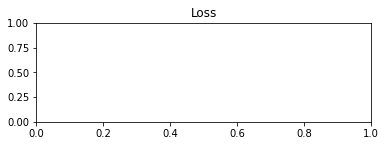

In [ ]:
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history['loss'], label='train')
pyplot.plot(history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history['accuracy'], label='train')
pyplot.plot(history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

End of LSTM Implementation


---



# Data Prep for RFC, Logistic Regression, SVM etc..

In [ ]:
df_train=pd.read_csv('/content/drive/MyDrive/AI-Project-Toxic-classification/Jigsaw dataset/train/train.csv')
df_test=pd.read_csv('/content/drive/MyDrive/AI-Project-Toxic-classification/Jigsaw dataset/test/test.csv')

In [ ]:
#total columns in the dataset
colms=df_train.columns.tolist()
colms=colms[2:]
print(colms)

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']


In [ ]:
col_count=[]
for col in colms:
  count=0
  for items in df_train[col]:
    if items==1:
      count+=1
  col_count.append(count)

zip_col= list(zip(colms, col_count))
print(zip_col)



[('toxic', 15294), ('severe_toxic', 1595), ('obscene', 8449), ('threat', 478), ('insult', 7877), ('identity_hate', 1405)]


In [ ]:
df_train["comment_text"].fillna("unknown", inplace=True)
df_train["comment_text"].fillna("unknown", inplace=True)

In [ ]:
df_train.head()
df_train=df_train.sample(n=100000)

In [ ]:
col_count=[]
for col in colms:
  count=0
  for items in df_train[col]:
    if items==1:
      count+=1
  col_count.append(count)

fig = plt.figure()
ax=fig.add_subplot(111)
ax.bar(colms, col_count)
plt.show()

NameError: ignored

In [ ]:
zip_col= list(zip(colms, col_count))
print(zip_col)

#[('toxic', 15294), ('severe_toxic', 1595), ('obscene', 8449), ('threat', 478), ('insult', 7877), ('identity_hate', 1405)]

[('toxic', 4757), ('severe_toxic', 498), ('obscene', 2628), ('threat', 160), ('insult', 2422), ('identity_hate', 456)]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


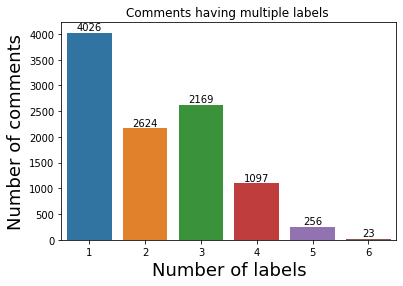

In [ ]:
rowSums = df_train.iloc[:,2:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)
plt.title("Comments having multiple labels ")
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

In [ ]:
#Analyzing the amount and the types of stopwords using the corpus of the nltk library. 
#Nltk contains stopwords from many languages. Considering only English here.  
import nltk
import re, string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
stop=set(stopwords.words('english'))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stemmer = PorterStemmer()
df_train['comment_text'] = df_train['comment_text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in stop]).lower())

RecursionError: ignored

In [ ]:
#Removing stopwords
###################################################
def remove_stopwords(df):
    corp=[]
    for df_t in df['comment_text']:
      if (df_t not in stop):
        corp.append(df_t)
    return corp

wostopwords=remove_stopwords(df_train)
df_train['comment_text']=wostopwords
df_train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0
1,000103f0d9cfb60f,daww! he matches this background colour im see...,0,0,0,0,0,0
2,000113f07ec002fd,"hey man, im really not trying to edit war. its...",0,0,0,0,0,0
3,0001b41b1c6bb37e,""" more i cant make any real suggestions on imp...",0,0,0,0,0,0
4,0001d958c54c6e35,"you, sir, are my hero. any chance you remember...",0,0,0,0,0,0


In [ ]:
#Lowercasing all comments, removing unnecessary spaces
###############################################
df_train['comment_text']=df_train['comment_text'].str.lower().str.strip()
df_train = df_train.replace('\n',' ', regex=True)
df_train = df_train.replace('\t',' ', regex=True)
df_train = df_train.replace('\r',' ', regex=True)
df_train['comment_text']= df_train['comment_text'].replace("’", "", regex=True)
df_train['comment_text'] = df_train['comment_text'].replace("'", "", regex=True)
df_train['comment_text'] = df_train['comment_text'].replace("-", " ", regex=True)
df_train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0
1,000103f0d9cfb60f,daww! he matches this background colour im see...,0,0,0,0,0,0
2,000113f07ec002fd,"hey man, im really not trying to edit war. its...",0,0,0,0,0,0
3,0001b41b1c6bb37e,""" more i cant make any real suggestions on imp...",0,0,0,0,0,0
4,0001d958c54c6e35,"you, sir, are my hero. any chance you remember...",0,0,0,0,0,0


In [ ]:
'''text: list of text documents'''
def tokenize(text):
    tokenized =  sent_tokenize(text)
    return tokenized

for comm in df_train:
  comm=tokenize(comm)
#df_train =  tokenize(df_train)

In [ ]:
import pickle
import os

In [ ]:
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_train["comment_text"], df_train[colms].values, test_size=0.30)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(35000,) (15000,) (35000, 6) (15000, 6)


## Vectorization Functions

COUNT_VEC <br>
TFIDF<br>
WORD2VEC<br>
GLOVE(Done Above in DL models)<br>

In [ ]:
#Count Vectorization

In [ ]:
def vectorize_countvec(X_train, X_test):
  count_vec= CountVectorizer()
  X_train=count_vec.fit_transform(X_train)
  X_test=count_vec.fit_transform(X_test)

vectorize_countvec(X_train, X_test)

In [ ]:
#TFIDF

In [ ]:
vect_word = TfidfVectorizer(max_features=15000, lowercase=True, analyzer='word',
                        stop_words= 'english',ngram_range=(1,3),dtype=np.float32)

In [ ]:
X_train = vect_word.fit_transform(X_train)
X_test = vect_word.transform(X_test)


In [ ]:
X_train.shape

(35000, 15000)

In [ ]:
X_test.shape


(15000, 15000)

In [ ]:
X_train = sparse.hstack(X_train)
X_test = sparse.hstack(X_test)

In [ ]:
#Word to Vector

In [ ]:
from gensim.models import word2vec
def vectorize_word2vec(X_train, X_test):
  count_vec= CountVectorizer()
  X_train=count_vec.fit_transform(X_train)
  X_test=count_vec.fit_transform(X_test)
  
  train_tokenized_sentences = [sentence.split() for sentence in X_train]
  test_tokenized_sentences = [sentence.split() for sentence in X_test]
  X_train = word2vec.Word2Vec(train_tokenized_sentences, min_count=2)
  X_test = word2vec.Word2Vec(test_tokenized_sentences, min_count=2)
  
vectorize_word2vec(X_train, X_test)

#### Data used for following algos is minimized, due to computational inefficiency. (sliced to 50k values of 159k)
#### To Do: Increase data size to improve results

# Easy Data Augmentation

n= al where, <br>
n= no of words to be replaced <br>
a=constant, hyperparameter <br>
l=length of sentence <br>

 To run algos on Augmented Data, replace df_train with "Augmented_Sentences"

In [ ]:
EDA_df = df_train.sample(frac=0.05)
print(len(EDA_df))
EDA_df.head()

7979


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
98609,0f754d80db105111,benidorm speak valencian catalan edited insult...,0,0,0,0,0,0
46886,7d4f05ca7a4ba321,agree description publication magazine profess...,0,0,0,0,0,0
7830,14d9522b731d0088,australian skittles im working abroad australi...,0,0,0,0,0,0
138364,e446e3168acb062d,anonymous relation prject chanology versus unr...,0,0,0,0,0,0
130631,bacd8d289c6a4fec,limits done brief passages think claim little ...,0,0,0,0,0,0


In [ ]:
com_text=EDA_df['comment_text'].tolist()
print(len(com_text))

7979


In [ ]:
import random
from random import shuffle
from nltk.corpus import wordnet

In [ ]:
def synonym_replacement(words, n):
	new_words = words.copy()
	random_word_list = list(set([word for word in words if word not in stop]))
	random.shuffle(random_word_list)
	num_replaced = 0
	for random_word in random_word_list:
		synonyms = get_synonyms(random_word)
		if len(synonyms) >= 1:
			synonym = random.choice(list(synonyms))
			new_words = [synonym if word == random_word else word for word in new_words]
			#print("replaced", random_word, "with", synonym)
			num_replaced += 1
		if num_replaced >= n: #only replace up to n words
			break

	#this is stupid but we need it, trust me
	sentence = ' '.join(new_words)
	new_words = sentence.split(' ')

	return new_words

def get_synonyms(word):
	synonyms = set()
	for syn in wordnet.synsets(word): 
		for l in syn.lemmas(): 
			synonym = l.name()#.replace("_", " ").replace("-", " ").lower()
			synonym = "".join([char for char in synonym if char in ' qwertyuiopasdfghjklzxcvbnm'])
			synonyms.add(synonym) 
	if word in synonyms:
		synonyms.remove(word)
	return list(synonyms)

In [ ]:
def random_swap(words, n):
  if len(words)<2:
    return words
  new_words = words.copy()
  for _ in range(int(n)):
    new_words = swap_word(new_words)
  return new_words

def swap_word(new_words):
	random_idx_1 = random.randint(0, len(new_words)-1)
	random_idx_2 = random_idx_1
	counter = 0
	while random_idx_2 == random_idx_1:
		random_idx_2 = random.randint(0, len(new_words)-1)
		counter += 1
		if counter > 3:
			return new_words
	new_words[random_idx_1], new_words[random_idx_2] = new_words[random_idx_2], new_words[random_idx_1] 
	return new_words


In [ ]:
def random_insertion(words, n):
  if len(words)<2:
    return words
  new_words = words.copy()
  for _ in range(int(n)):
    add_word(new_words)
  return new_words

def add_word(new_words):
	synonyms = []
	counter = 0
	while len(synonyms) < 1:
		random_word = new_words[random.randint(0, len(new_words)-1)]
		synonyms = get_synonyms(random_word)
		counter += 1
		if counter >= 10:
			return
	random_synonym = synonyms[0]
	random_idx = random.randint(0, len(new_words)-1)
	new_words.insert(random_idx, random_synonym)

In [ ]:
def random_deletion(words, p):

	#obviously, if there's only one word, don't delete it
	if len(words) <= 2:
		return words

	#randomly delete words with probability p
	new_words = []
	for word in words:
		r = random.uniform(0, 1)
		if r > p:
			new_words.append(word)

	#if you end up deleting all words, just return a random word
	if len(new_words) == 0:
		rand_int = random.randint(0, len(words)-1)
		return [words[rand_int]]

	return new_words

In [ ]:
def EDA_func(sentence):
  words = sentence.split(' ')
  words = [word for word in words if word is not '']
  num_words=len(words)
  num_aug= 5
  augmented_sentences = []
  a= 0.1
  p=0.1
  n= max(1, a* num_words)
  for _ in range(num_aug):
    aug_words = synonym_replacement(words, n)
    augmented_sentences.append(' '.join(aug_words))

  for _ in range(num_aug):
    aug_words = random_swap(words, n)
    augmented_sentences.append(' '.join(aug_words))

  for _ in range(num_aug):
    aug_words = random_insertion(words, n)
    augmented_sentences.append(' '.join(aug_words))

  for _ in range(num_aug):
    aug_words = random_deletion(words, p)
    augmented_sentences.append(' '.join(aug_words))

  return augmented_sentences

"""

	words = sentence.split(' ')
	words = [word for word in words if word is not '']
	num_words = len(words)
  #num_aug=50
  #num_aug = 50
  #augmented_sentences=[]
  #a = 0.2
  n= max(1, a * len(words))
  for _ in range(num_new_per_technique):
			a_words = synonym_replacement(words, n)
			augmented_sentences.append(' '.join(a_words))

return augmented_sentences
"""

"\n\n\twords = sentence.split(' ')\n\twords = [word for word in words if word is not '']\n\tnum_words = len(words)\n  #num_aug=50\n  #num_aug = 50\n  #augmented_sentences=[]\n  #a = 0.2\n  n= max(1, a * len(words))\n  for _ in range(num_new_per_technique):\n\t\t\ta_words = synonym_replacement(words, n)\n\t\t\taugmented_sentences.append(' '.join(a_words))\n\nreturn augmented_sentences\n"

In [ ]:
augmented_sentences= []
for sent in com_text:
  #print('done 1 iteration')
  augmented_sentences.append(EDA_func(sent))

In [ ]:
print(len(augmented_sentences))
print(len(augmented_sentences[1]))
for i in range(5):
  print(augmented_sentences[i])

7979
20
['benidorm speak valencian atalan edited contemptuous would someone language replaced wiped one thanks', 'benidorm utter valencian catalan redact insulting would someone language replaced wiped one thanks', 'benidorm speak valencian atalan edited insulting would someone language substitute wiped one thanks', 'benidorm speak valencian catalan editout insulting would somebody language replaced wiped one thanks', 'benidorm verbalize valencian atalan edited insulting would someone language replaced wiped one thanks', 'benidorm speak valencian catalan edited insulting one someone language replaced wiped would thanks', 'edited speak valencian catalan benidorm insulting would someone language replaced wiped one thanks', 'benidorm would valencian catalan edited insulting speak someone language replaced wiped one thanks', 'insulting speak valencian catalan edited benidorm would someone language replaced wiped one thanks', 'benidorm speak valencian catalan edited insulting would replaced

Performed Easy  Data Augmentation. <br>
a= 0.01<br>
number of sentences to be generated for each of SR, RS, RI, RD = 5,<br>
So 20 sentences are generated for each sentence. <br>
Now we have 7979 * 20 = 15958 sentences thorugh EDA<br>

In [ ]:
flat_list = [item for sublist in augmented_sentences for item in sublist]

In [ ]:
len(flat_list)

159580

In [ ]:
eda_col=EDA_df[['toxic', 'severe_toxic', 'obscene',	'threat','insult','identity_hate' ]].copy()
eda_col.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
98609,0,0,0,0,0,0
46886,0,0,0,0,0,0
7830,0,0,0,0,0,0
138364,0,0,0,0,0,0
130631,0,0,0,0,0,0


In [ ]:
eda_col=eda_col.values.tolist()

In [ ]:
import itertools

#lst = range(1,5)
#list(itertools.chain.from_iterable(itertools.repeat(x, 3) for x in lst))

In [ ]:
eda_col2=list(itertools.chain.from_iterable(itertools.repeat(x, 20) for x in eda_col))

print(len(eda_col), len(eda_col2))
for i in range (10):
  print(eda_col2[i])

7979 159580
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]


In [ ]:
EDA_cols = pd.DataFrame(eda_col2)

In [ ]:
EDA_Data = pd.DataFrame(flat_list)

In [ ]:
len(EDA_Data)

159580

In [ ]:
EDA_Data.head()

,0
0,benidorm speak valencian atalan edited contemp...
1,benidorm utter valencian catalan redact insult...
2,benidorm speak valencian atalan edited insulti...
3,benidorm speak valencian catalan editout insul...
4,benidorm verbalize valencian atalan edited ins...


## EDA_cols.csv are the values<br>
## EDA_df_comments.csv are the comments :)

## Edited, saved as EDA_cols2 and EDA_df_comments2


In [ ]:
EDA_cols.to_csv('/content/drive/MyDrive/AI-Project-Toxic-classification/EDA_cols2.csv')

In [ ]:
EDA_Data.to_csv('/content/drive/MyDrive/AI-Project-Toxic-classification/EDA_df_comments2.csv')

# Logistic Regression

In [ ]:
vect_word = TfidfVectorizer(max_features=20000, lowercase=True, analyzer='word',
                        stop_words= 'english',ngram_range=(1,3),dtype=np.float32)
vect_char = TfidfVectorizer(max_features=40000, lowercase=True, analyzer='char',
                        stop_words= 'english',ngram_range=(3,6),dtype=np.float32)

In [ ]:
# Word ngram vector
tr_vect = vect_word.fit_transform(df_train['comment_text'])
ts_vect = vect_word.transform(df_test['comment_text'])

# Character n gram vector
#tr_vect_char = vect_char.fit_transform(df_train['comment_text'])
#ts_vect_char = vect_char.transform(df_test['comment_text'])

In [ ]:
#X = sparse.hstack([tr_vect, tr_vect_char])
#x_test = sparse.hstack([ts_vect, ts_vect_char])
X = sparse.hstack(tr_vect)
x_test = sparse.hstack(ts_vect)

In [ ]:
y = df_train[classes]
del tr_vect, ts_vect, tr_vect_char, ts_vect_char

In [ ]:
prd = np.zeros((x_test.shape[0],y.shape[1]))
cv_score =[]
for i,col in enumerate(colms):
    lr = LogisticRegression(C=2,random_state = i,class_weight = 'balanced')
    print('Building {} model for column:{''}'.format(i,col)) 
    lr.fit(X,y[col])
    #cv_score.append(lr.score)
    prd[:,i] = lr.predict_proba(x_test)[:,1]

Building 0 model for column:toxic


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Building 1 model for column:severe_toxic


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Building 2 model for column:obscene


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Building 3 model for column:threat
Building 4 model for column:insult


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Building 5 model for column:identity_hate


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
for col in classes:
  print("Column:",col)
  pred =  lr.predict(x_test)
  print('\nConfusion matrix\n',confusion_matrix(y[col],pred))
  print(classification_report(y[col],pred))

In [ ]:
for col in classes:
  print("Column:",col)
  pred =  lr.predict(x_test)
  print('\nConfusion matrix\n',confusion_matrix(y[col],pred))
  print(classification_report(y[col],pred))

Column: toxic

Confusion matrix
 [[143846    431]
 [ 12567   2727]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96    144277
           1       0.86      0.18      0.30     15294

    accuracy                           0.92    159571
   macro avg       0.89      0.59      0.63    159571
weighted avg       0.91      0.92      0.89    159571

Column: severe_toxic

Confusion matrix
 [[155478   2498]
 [   935    660]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99    157976
           1       0.21      0.41      0.28      1595

    accuracy                           0.98    159571
   macro avg       0.60      0.70      0.63    159571
weighted avg       0.99      0.98      0.98    159571

Column: obscene

Confusion matrix
 [[149999   1123]
 [  6414   2035]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98    151122
           1       0.64 

#### Below method does not work because of multiple labels. Use loops for using one-vs-all approach

In [ ]:
from sklearn.tree import LogisticRegression

In [ ]:
X_train = sparse.hstack(X_train)
X_test = sparse.hstack(X_test)

In [ ]:
log_reg = LogisticRegression()
# Train Decision Tree Classifer
log_reg = log_reg.fit(X_train,y_train)
with open('/content/drive/MyDrive/AI-Project-Toxic-classification/LogisticRegression.pickle', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
#Predict the response for test dataset
y_pred = log_reg.predict(X_test)

In [ ]:
print(classification_report(y_test, log_reg.predict(X_test)))
print(confusion_matrix(y_test.argmax(axis=1), log_reg.predict(X_test).argmax(axis=1)))

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RFC = RandomForestClassifier()
model = RFC.fit(X_train, y_train)
with open('/content/drive/MyDrive/AI-Project-Toxic-classification/RandomForestClassifier.pickle', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test, model.predict(X_test)))
print(confusion_matrix(y_test.argmax(axis=1), model.predict(X_test).argmax(axis=1)))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.85      0.62      0.72      1450
           1       0.44      0.08      0.13       139
           2       0.85      0.69      0.76       765
           3       1.00      0.02      0.04        51
           4       0.73      0.50      0.59       725
           5       0.37      0.06      0.10       126

   micro avg       0.82      0.56      0.66      3256
   macro avg       0.71      0.33      0.39      3256
weighted avg       0.79      0.56      0.64      3256
 samples avg       0.06      0.05      0.05      3256

[[14918     1     0     1     0]
 [   48     0     0     0     0]
 [    2     0     0     0     0]
 [   26     0     0     0     0]
 [    4     0     0     0     0]]


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
X_train = sparse.hstack(X_train)
X_test = sparse.hstack(X_test)

In [ ]:
dec_tree = DecisionTreeClassifier()
# Train Decision Tree Classifer
dec_tree = dec_tree.fit(X_train,y_train)
with open('/content/drive/MyDrive/AI-Project-Toxic-classification/DecisionTreeClassifier.pickle', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
#Predict the response for test dataset
y_pred = dec_tree.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
print(confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.67      0.65      0.66      1450
           1       0.33      0.29      0.31       139
           2       0.76      0.72      0.74       765
           3       0.17      0.10      0.12        51
           4       0.57      0.53      0.55       725
           5       0.31      0.25      0.27       126

   micro avg       0.64      0.60      0.62      3256
   macro avg       0.47      0.42      0.44      3256
weighted avg       0.63      0.60      0.61      3256
 samples avg       0.06      0.05      0.05      3256

[[14887    17     3    10     3]
 [   46     2     0     0     0]
 [    2     0     0     0     0]
 [   25     0     0     0     1]
 [    4     0     0     0     0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Warning since some comments are not toxic nature, and don't fall in any category

In [ ]:
#metrics.f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))

# NBSVM
## (TO DO)

# NBSVM

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/AI-Project-Toxic-classification/Jigsaw dataset/train/train.csv")

In [ ]:
label_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
train['none'] = 1-train[label_cols].max(axis=1)
train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,none
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805,0.898321
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420,0.302226
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
COMMENT = 'comment_text'
train[COMMENT].fillna("unknown", inplace=True)
test[COMMENT].fillna("unknown", inplace=True)

In [ ]:
train[COMMENT].isna().sum()

0

In [ ]:
import re, string
re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')
def tokenize(s): return re_tok.sub(r' \1 ', s).split()

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
n = train.shape[0]
vec = TfidfVectorizer(ngram_range=(1,2), tokenizer=tokenize,
               min_df=3, max_df=0.9, strip_accents='unicode', use_idf=1,
               smooth_idf=1, sublinear_tf=1 )
trn_term_doc = vec.fit_transform(train[COMMENT])
#test_term_doc = vec.transform(test[COMMENT])

In [ ]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression

In [ ]:
x = trn_term_doc
#test_x = test_term_doc

In [ ]:
def pr(y_i, y):
    p = X_train[y==y_i].sum(0)
    return (p+1) / ((y==y_i).sum()+1)

In [ ]:
def get_mdl(y):
    y = y.values
    r = np.log(pr(1,y) / pr(0,y))
    m = LogisticRegression(C=4, dual=True)
    x_nb = x.multiply(r)
    return m.fit(x_nb, y), r

In [ ]:
preds = np.zeros((len(test), len(label_cols)))

for i, j in enumerate(label_cols):
    print('fit', j)
    m,r = get_mdl(train[j])
    preds[:,i] = m.predict_proba(test_x.multiply(r))[:,1]

#Extrapolatory Data Analysis (more)

In [ ]:
#import required packages
#basics
import pandas as pd 
import numpy as np

#misc
import gc
import time
import warnings

#stats

from scipy import sparse
import scipy.stats as ss

#viz
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
from PIL import Image
import matplotlib_venn as venn

#nlp
import string
import re    #for regex
import nltk
from nltk.corpus import stopwords
import spacy
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
# Tweet tokenizer does not split at apostophes which is what we want
from nltk.tokenize import TweetTokenizer   
import nltk
nltk.download('stopwords')

#FeatureEngineering
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split


#settings
start_time=time.time()
color = sns.color_palette()
sns.set_style("dark")
eng_stopwords = set(stopwords.words("english"))
warnings.filterwarnings("ignore")

lem = WordNetLemmatizer()
tokenizer=TweetTokenizer()

%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/AI-Project-Toxic-classification/Jigsaw dataset/train')

ParserError: ignored

In [ ]:
clean_mask=clean_mask[:,:,1]
#wordcloud for clean comments
subset=train[train.clean==True]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=2000,mask=clean_mask,stopwords=stopword)
wc.generate(" ".join(text))
plt.figure(figsize=(20,10))
plt.axis("off")
plt.title("Words frequented in Clean Comments", fontsize=20)
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=0.98)
plt.show()